### STOCK MARKET EXPERIENCE 3
## shorten with functions

In [1]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import talib
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import pickle 
from xgboost import plot_importance

In [2]:
def ListDiff(first, second):
        second = set(second)
        return [item for item in first if item not in second]

# STOCKS

In [3]:
# main function to create the necessary variables for any Symbols
def stock_bring(symb):
   tbl1 = pdr.get_data_yahoo(symb, 
                          start=sdate, 
                          end=edate)
   # Create 5 and 3-day % changes of Close for the current day, and 5 days in the future
   tbl1['5d_future_close'] = tbl1['Close'].shift(-5) # the price in 5 days for prediction purposes
   tbl1['4d_future_close'] = tbl1['Close'].shift(-4) # the price in 3 days for prediction purposes
   tbl1['3d_future_close'] = tbl1['Close'].shift(-3) # the price in 3 days for prediction purposes
   tbl1['2d_future_close'] = tbl1['Close'].shift(-2) # the price in 3 days for prediction purposes    
   tbl1['1d_future_close'] = tbl1['Close'].shift(-1) # the price in 5 days for prediction purposes    
   tbl1['5d_close_future_pct'] = tbl1['5d_future_close'].pct_change(5) # the future price change compared to the actual one
   tbl1['4d_close_future_pct'] = tbl1['4d_future_close'].pct_change(4) # the future price change compared to the actual one
   tbl1['3d_close_future_pct'] = tbl1['3d_future_close'].pct_change(3) # the future price change compared to the actual one
   tbl1['2d_close_future_pct'] = tbl1['2d_future_close'].pct_change(2) # the future price change compared to the actual one
   tbl1['1d_close_future_pct'] = tbl1['1d_future_close'].pct_change(1) # the future price change compared to the actual one    
    
   tbl1['5d_close_pct'] = tbl1['Close'].pct_change(5) # the actual price change compared to the 5 days ago one
   tbl1['1d_close_pct'] = tbl1['Close'].pct_change(1) # the actual price change compared to the 1 days ago one
    
    
    
   feature_names = ['High', 'Low', 'Open', 'Close', '5d_close_pct', '1d_close_pct','5d_future_close','4d_future_close',
                    '3d_future_close','2d_future_close','1d_future_close',
                   '5d_close_future_pct','4d_close_future_pct', '3d_close_future_pct','2d_close_future_pct',
                    '1d_close_future_pct']  # a list of the feature names for later

   # Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
   for n in [14,30]:

        # Create the moving average indicator and divide by Close
        tbl1['ma' + str(n)] = talib.SMA(tbl1['Close'].values,
                              timeperiod=n) / tbl1['Close']
        # Create the exponential moving average indicator and divide by Close
        tbl1['ema' + str(n)] = talib.EMA(tbl1['Close'].values,
                              timeperiod=n) / tbl1['Close']
        # Create the RSI indicator
        tbl1['rsi' + str(n)] = talib.RSI(tbl1['Close'].values, timeperiod= n)
    
        # Add rsi and moving average to the feature name list
        feature_names = feature_names + ['ma' + str(n), 'ema' + str(n), 'rsi' + str(n)]
   tbl1 = tbl1.dropna()
   new_features = ['Volume_1d_change', 'Volume_1d_change_SMA']
   feature_names.extend(new_features)
   tbl1['Volume_1d_change'] = tbl1['Volume'].pct_change()
   tbl1['Volume_1d_change_SMA'] = talib.SMA(tbl1['Volume_1d_change'].values,
                        timeperiod=5)
    

   return tbl1, feature_names

In [4]:
stock_list = ['aapl', 'amzn' , 'googl', 'face', 'tsla', 'nflx', 'msft','mu','csco', 'orcl','cdns', 'gld']
symb_list = ['AAPL', 'AMZN' , 'GOOGL', 'FB', 'TSLA', 'NFLX', 'MSFT','MU', 'CSCO', 'ORCL','CDNS', 'GLD']

sdate = datetime.datetime(2016, 1, 1)
edate = datetime.datetime(2019, 8, 13)

In [5]:
# CHECK IF THEY ARE NOT TOO NEW
#for symb in symb_list:
    #print(symb + ':')
    #print(stock_bring(symb)[0].loc[:,'Close'].head(1))
   # print(stock_bring(symb)[0].loc[:,'Close'].tail(1))

In [6]:
#for s in stock_list:
    #print(s)
    #s = stock_bring(symb_list[stock_list.index(s)])[0]
    #print(s.loc[:,'Close'].head(1))
    #print s.


In [7]:
aapl, aapl_features = stock_bring('AAPL')
amzn, amzn_features  = stock_bring('AMZN')
googl, googl_features  = stock_bring('GOOGL')
face, face_features  = stock_bring('FB')
tsla, tsla_features  = stock_bring('TSLA')
nflx, nflx_features  = stock_bring('NFLX')
msft, msft_features  = stock_bring('MSFT')
mu, mu_features  = stock_bring('MU')
csco, csco_features  = stock_bring('CSCO')
orcl, orcl_features  = stock_bring('ORCL')
cdns, cdns_features  = stock_bring('CDNS')
gld, gld_features  = stock_bring('GLD')

In [8]:
# create the tables and feature list
aapl.columns = ['aapl_' +str(col)  for col in aapl.columns]
aapl_features = ['aapl_' +str(name)  for name in aapl_features]

amzn.columns = ['amzn_' +str(col)  for col in amzn.columns]
amzn_features = ['amzn_' +str(name)  for name in amzn_features]

googl.columns = ['googl_' +str(col)  for col in googl.columns]
googl_features = ['googl_' +str(name)  for name in googl_features]

face.columns = ['face_' +str(col)  for col in face.columns]
face_features = ['face_' +str(name)  for name in face_features]

tsla.columns = ['tsla_' +str(col)  for col in tsla.columns]
tsla_features = ['tsla_' +str(name)  for name in tsla_features]

nflx.columns = ['nflx_' +str(col)  for col in nflx.columns]
nflx_features = ['nflx_' +str(name)  for name in nflx_features]

msft.columns = ['msft_' +str(col)  for col in msft.columns]
msft_features = ['msft_' +str(name)  for name in msft_features]

mu.columns = ['mu_' +str(col)  for col in mu.columns]
mu_features = ['mu_' +str(name)  for name in mu_features]

csco.columns = ['csco_' +str(col)  for col in csco.columns]
csco_features = ['csco_' +str(name)  for name in csco_features]

orcl.columns = ['orcl_' +str(col)  for col in orcl.columns]
orcl_features = ['orcl_' +str(name)  for name in orcl_features]

cdns.columns = ['cdns_' +str(col)  for col in cdns.columns]
cdns_features = ['cdns_' +str(name)  for name in cdns_features]

gld.columns = ['gld_' +str(col)  for col in gld.columns]
gld_features = ['gld_' +str(name)  for name in gld_features]

In [9]:
# join the tables into one ['aapl', 'amzn' , 'googl', 'face', 'tsla', 'nflx', 'msft','mu','csco', 'orcl']
m_table = aapl.join(amzn[amzn_features])
m_table = m_table.join(googl[googl_features])
m_table = m_table.join(face[face_features])
m_table = m_table.join(tsla[tsla_features])
m_table = m_table.join(nflx[nflx_features])
m_table = m_table.join(msft[msft_features])
m_table = m_table.join(mu[mu_features])
m_table = m_table.join(csco[csco_features])
m_table = m_table.join(orcl[orcl_features])
m_table = m_table.join(cdns[cdns_features])
m_table = m_table.join(gld[gld_features])

m_feature = aapl_features +amzn_features +googl_features +face_features +tsla_features +nflx_features +msft_features +\
            mu_features +csco_features +orcl_features+cdns_features+gld_features

In [10]:
m_table['gld_4d_future_close'].tail()

Date
2019-07-30    137.789993
2019-07-31    138.910004
2019-08-01    141.020004
2019-08-02    141.729996
2019-08-05    141.259995
Name: gld_4d_future_close, dtype: float64

In [11]:
targets = ['aapl_5d_future_close', 'aapl_3d_future_close', 
          'amzn_5d_future_close', 'amzn_3d_future_close',
          'googl_5d_future_close', 'googl_3d_future_close',
          'face_5d_future_close', 'face_3d_future_close',
          'tsla_5d_future_close', 'tsla_3d_future_close',
          'nflx_5d_future_close', 'nflx_3d_future_close',
          'msft_5d_future_close', 'msft_3d_future_close',
          'mu_5d_future_close', 'mu_3d_future_close',
          'csco_5d_future_close', 'csco_3d_future_close',
          'orcl_5d_future_close', 'orcl_3d_future_close',
          'cdns_5d_future_close', 'cdns_3d_future_close',
           'gld_5d_future_close', 'gld_3d_future_close',
          'aapl_4d_future_close', 'aapl_2d_future_close', 
          'amzn_4d_future_close', 'amzn_2d_future_close',
          'googl_4d_future_close', 'googl_2d_future_close',
          'face_4d_future_close', 'face_2d_future_close',
          'tsla_4d_future_close', 'tsla_2d_future_close',
          'nflx_4d_future_close', 'nflx_2d_future_close',
          'msft_4d_future_close', 'msft_2d_future_close',
          'mu_4d_future_close', 'mu_2d_future_close',
          'csco_4d_future_close', 'csco_2d_future_close',
          'orcl_4d_future_close', 'orcl_2d_future_close',
          'cdns_4d_future_close', 'cdns_2d_future_close',
           'gld_4d_future_close', 'gld_2d_future_close',
          'aapl_1d_future_close', 
          'amzn_1d_future_close', 
          'googl_1d_future_close',
          'face_1d_future_close',
          'tsla_1d_future_close',
          'nflx_1d_future_close',
          'msft_1d_future_close',
          'mu_1d_future_close', 
          'csco_1d_future_close', 
          'orcl_1d_future_close',
          'cdns_1d_future_close',
          'gld_1d_future_close']
targets_pct = ['aapl_5d_close_future_pct', 'aapl_3d_close_future_pct', 
          'amzn_5d_close_future_pct', 'amzn_3d_close_future_pct',
          'googl_5d_close_future_pct', 'googl_3d_close_future_pct',
          'face_5d_close_future_pct', 'face_3d_close_future_pct',
          'tsla_5d_close_future_pct', 'tsla_3d_close_future_pct',
          'nflx_5d_close_future_pct', 'nflx_3d_close_future_pct',
          'msft_5d_close_future_pct', 'msft_3d_close_future_pct',
          'mu_5d_close_future_pct', 'mu_3d_close_future_pct',
          'csco_5d_close_future_pct', 'csco_3d_close_future_pct',
          'orcl_5d_close_future_pct', 'orcl_3d_close_future_pct',
          'cdns_5d_close_future_pct', 'cdns_3d_close_future_pct',
          'gld_5d_close_future_pct', 'gld_3d_close_future_pct',
          'aapl_4d_close_future_pct', 'aapl_2d_close_future_pct', 
          'amzn_4d_close_future_pct', 'amzn_2d_close_future_pct',
          'googl_4d_close_future_pct', 'googl_2d_close_future_pct',
          'face_4d_close_future_pct', 'face_2d_close_future_pct',
          'tsla_4d_close_future_pct', 'tsla_2d_close_future_pct',
          'nflx_4d_close_future_pct', 'nflx_2d_close_future_pct',
          'msft_4d_close_future_pct', 'msft_2d_close_future_pct',
          'mu_4d_close_future_pct', 'mu_2d_close_future_pct',
          'csco_4d_close_future_pct', 'csco_2d_close_future_pct',
          'orcl_4d_close_future_pct', 'orcl_2d_close_future_pct',
          'cdns_4d_close_future_pct', 'cdns_2d_close_future_pct',
          'gld_4d_close_future_pct', 'gld_2d_close_future_pct',
          'aapl_1d_close_future_pct', 
          'amzn_1d_close_future_pct', 
          'googl_1d_close_future_pct',
          'face_1d_close_future_pct', 
          'tsla_1d_close_future_pct', 
          'nflx_1d_close_future_pct', 
          'msft_1d_close_future_pct', 
          'mu_1d_close_future_pct', 
          'csco_1d_close_future_pct',
          'orcl_1d_close_future_pct',
          'cdns_1d_close_future_pct',
          'gld_1d_close_future_pct'    ]
fetures = ListDiff(ListDiff(m_feature,targets),targets_pct)
# in this way we keep the order of the features!!!!!!!!!!!!!!

In [12]:
m_table.describe()
toexc = m_table.describe()
type(toexc)
toexc.to_excel("quartiles.xlsx")

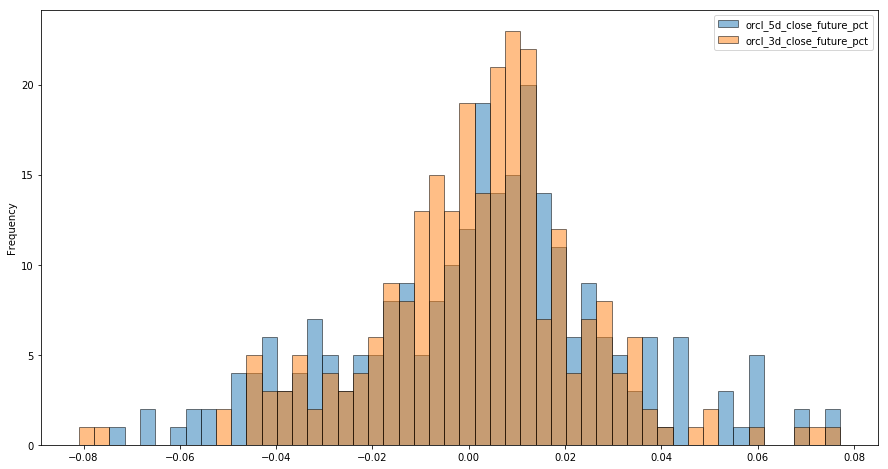

<Figure size 1080x576 with 0 Axes>

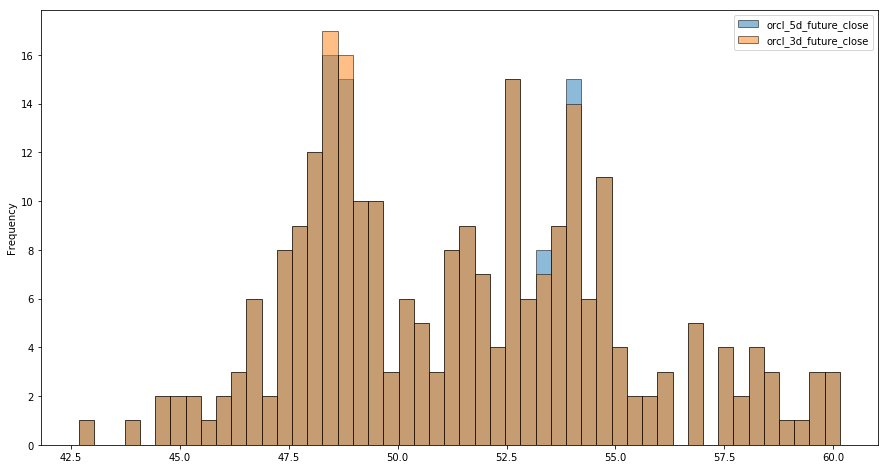

In [13]:
# Plot histogram of volume % change data
exam = targets_pct[18:20]
exam2 = targets[18:20]

plt.rcParams['figure.figsize'] = [15, 8]
m_table.loc['2018-08-01':,exam].plot(kind='hist', sharex=False, bins=50, alpha = 0.5, edgecolor = 'black')
plt.show()
plt.clf()
m_table.loc['2018-08-01':,exam2].plot(kind='hist', sharex=False, bins=50, alpha = 0.5, edgecolor = 'black')
plt.show()

In [14]:
exam = targets_pct[0:22]
print(exam)
m_table[exam].quantile([0.5,0.75,0.9])

['aapl_5d_close_future_pct', 'aapl_3d_close_future_pct', 'amzn_5d_close_future_pct', 'amzn_3d_close_future_pct', 'googl_5d_close_future_pct', 'googl_3d_close_future_pct', 'face_5d_close_future_pct', 'face_3d_close_future_pct', 'tsla_5d_close_future_pct', 'tsla_3d_close_future_pct', 'nflx_5d_close_future_pct', 'nflx_3d_close_future_pct', 'msft_5d_close_future_pct', 'msft_3d_close_future_pct', 'mu_5d_close_future_pct', 'mu_3d_close_future_pct', 'csco_5d_close_future_pct', 'csco_3d_close_future_pct', 'orcl_5d_close_future_pct', 'orcl_3d_close_future_pct', 'cdns_5d_close_future_pct', 'cdns_3d_close_future_pct']


,aapl_5d_close_future_pct,aapl_3d_close_future_pct,amzn_5d_close_future_pct,amzn_3d_close_future_pct,googl_5d_close_future_pct,googl_3d_close_future_pct,face_5d_close_future_pct,face_3d_close_future_pct,tsla_5d_close_future_pct,tsla_3d_close_future_pct,...,msft_5d_close_future_pct,msft_3d_close_future_pct,mu_5d_close_future_pct,mu_3d_close_future_pct,csco_5d_close_future_pct,csco_3d_close_future_pct,orcl_5d_close_future_pct,orcl_3d_close_future_pct,cdns_5d_close_future_pct,cdns_3d_close_future_pct
0.50,0.007185,0.003588,0.009100,0.005718,0.005468,0.003017,0.006184,0.003861,0.006052,0.002896,...,0.006012,0.003577,0.010863,0.006632,0.004834,0.003224,0.003230,0.002047,0.009211,0.004987
0.75,0.022913,0.016504,0.028052,0.020296,0.022843,0.017010,0.025218,0.018522,0.041177,0.032387,...,0.022583,0.015677,0.048411,0.034248,0.022181,0.014123,0.016885,0.012242,0.024758,0.017747
0.90,0.041437,0.031462,0.048345,0.036529,0.038666,0.029198,0.044395,0.031943,0.073046,0.058641,...,0.037401,0.027082,0.090319,0.068256,0.035358,0.027157,0.033270,0.023659,0.042157,0.030640


In [15]:
m_table.head(2)

,aapl_High,aapl_Low,aapl_Open,aapl_Close,aapl_Volume,aapl_Adj Close,aapl_5d_future_close,aapl_4d_future_close,aapl_3d_future_close,aapl_2d_future_close,...,gld_2d_close_future_pct,gld_1d_close_future_pct,gld_ma14,gld_ema14,gld_rsi14,gld_ma30,gld_ema30,gld_rsi30,gld_Volume_1d_change,gld_Volume_1d_change_SMA
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-17,98.209999,96.150002,96.669998,98.120003,44863200.0,92.464752,96.099998,94.690002,96.879997,96.040001,...,0.018185,0.024333,0.971912,0.977857,67.008034,0.938881,0.939425,69.411036,NaN,NaN
2016-02-18,98.889999,96.089996,98.839996,96.260002,39021000.0,90.711960,96.760002,96.099998,94.690002,96.879997,...,-0.023671,-0.006002,0.955919,0.960677,71.824119,0.920836,0.922456,71.927353,0.283877,NaN


In [16]:
# Add the day info
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(m_table.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original dataframe index for merging
days_of_week.index = m_table.index

# Join the dataframe with the days of week dataframe
m_table = pd.concat([m_table, days_of_week], axis=1)

# Add days of week to feature names
fetures.extend(['weekday_' + str(i) for i in range(1, 5)])
m_table.dropna(inplace=True)  # drop missing values in-place
m_table.head(2)

,aapl_High,aapl_Low,aapl_Open,aapl_Close,aapl_Volume,aapl_Adj Close,aapl_5d_future_close,aapl_4d_future_close,aapl_3d_future_close,aapl_2d_future_close,...,gld_rsi14,gld_ma30,gld_ema30,gld_rsi30,gld_Volume_1d_change,gld_Volume_1d_change_SMA,weekday_1,weekday_2,weekday_3,weekday_4
Date,,,,,,,,,,,,,,,,,,,,,
2016-02-24,96.379997,93.32,93.980003,96.099998,36255700.0,90.561165,100.75,100.529999,96.690002,96.910004,...,65.720148,0.939384,0.943466,68.194934,0.98583,0.187346,0,1,0,0
2016-02-25,96.760002,95.25,96.050003,96.760002,27582700.0,91.183121,101.50,100.750000,100.529999,96.690002,...,66.322082,0.940790,0.944793,68.487984,-0.30317,0.069937,0,0,1,0


# BUILDING A MODEL
## Here is needed to change the symbol

In [273]:
# Here I can start playing with different symbols 1. nflx (10), 2. mu (14) 3.Amazon (2) 4. Apple (0) 5. google (4)
# 6. facebook (6) 7. Tesla (8) 8. Microsoft (12) 9. Cisco (16) 10. Oracle (18) 11. CDNS (20)
i = 22
m_table = m_table.dropna()
sel = targets_pct[i] # CHANGE HERE
y_perc = m_table[sel]

X = m_table[fetures]
print(y_perc.shape,X.shape,targets_pct[i]) # CHANGE HERE

(866,) (866, 172) gld_5d_close_future_pct


In [274]:
# calculate the binary variable from the perc - adding 0.005 as duty stamp
l = []
for i in range(y_perc.shape[0]):
    if y_perc[i] > 0.005:
        l.append(1)
    else:
        l.append(0)
y = pd.Series(l)
y.index = y_perc.index


In [275]:
# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * y.shape[0])
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(736, 172) (736,) (130, 172) (130,)


## simple gradient boosting model

In [276]:
gbc_rd = GradientBoostingClassifier()
gbc_rd.fit(X_train, y_train)
y_pred=gbc_rd.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred), gbc_rd)

Accuracy: 0.5538461538461539 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)


In [277]:
learning_rate = [1, 0.5,  0.1, 0.05]
n_estimators = [8, 16, 32, 64,100]
max_depths = [2,3,4]
min_samples_split = [0.1,  0.4, 0.7, 1.0]
min_samples_leaf =[0.1,0.3, 0.5]
max_features = [0.5,0.75,1.0]
random_state = [42,71]

gbc = GradientBoostingClassifier()

# Create a dictionary of hyperparameters to search
grid = {'learning_rate': learning_rate, 'n_estimators' : n_estimators, 'max_depth':max_depths, 
        'min_samples_split' : min_samples_split, 'min_samples_leaf' :min_samples_leaf ,'max_features': max_features,
        'random_state': random_state}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    gbc.set_params(**g)  # ** is "unpacking" the dictionary
    gbc.fit(X_train, y_train)
    test_scores.append(gbc.score(X_test, y_test))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.6153846153846154 {'random_state': 71, 'n_estimators': 100, 'min_samples_split': 0.4, 'min_samples_leaf': 0.1, 'max_features': 0.5, 'max_depth': 4, 'learning_rate': 1}


In [279]:
#Create a GB Classifier
gbc=GradientBoostingClassifier(n_estimators=100, min_samples_split = 0.4, max_features =0.5, min_samples_leaf =0.1,
                               max_depth =4,learning_rate =1.0, random_state = 71 )

#Train the model using the training sets y_pred=clf.predict(X_test)
gbc.fit(X_train,y_train)

y_pred=gbc.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6153846153846154


In [280]:
gbc.predict(X_test)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [281]:
for a in range(gbc.feature_importances_.shape[0]):
    if gbc.feature_importances_[a]>0:
        print(fetures[a],gbc.feature_importances_[a] )

aapl_High 0.004471650830279625
aapl_Low 0.0005763918769170369
aapl_Open 0.01691547304409891
aapl_Close 3.432707775598544e-05
aapl_5d_close_pct 0.000939263598410997
aapl_1d_close_pct 0.00012348426382410583
aapl_ma14 0.02239985797206354
aapl_ema14 0.0002734130850908455
aapl_rsi14 7.10496023354975e-05
aapl_ma30 0.036945746609659214
aapl_rsi30 0.03073037520637574
aapl_Volume_1d_change_SMA 0.006569501308524149
amzn_Close 0.0015341850112436202
amzn_5d_close_pct 0.003188140457106019
amzn_1d_close_pct 0.0005477734616061003
amzn_ema14 0.026088178615083914
amzn_rsi14 0.020490298642603957
amzn_ma30 0.010752370774197401
amzn_ema30 0.00406484385498821
amzn_Volume_1d_change 0.001406317265119346
amzn_Volume_1d_change_SMA 0.0048821791651149846
googl_5d_close_pct 0.00167614694111628
googl_1d_close_pct 0.0035384381762926954
googl_ma14 0.0023346117150914664
googl_ma30 0.008461262436216985
googl_rsi30 0.002129796135800414
googl_Volume_1d_change 0.0013155729288490672
googl_Volume_1d_change_SMA 0.0006196624

In [244]:
pred = pd.Series(y_pred)
pred.index = y_test.index
pred.name = 'pred'
one_var_startegy = pd.merge(pred, m_table, left_index=True, right_index=True)
#tes_startegy.to_excel("google_pred2.xlsx")
one_var_startegy.head(2)

,pred,aapl_High,aapl_Low,aapl_Open,aapl_Close,aapl_Volume,aapl_Adj Close,aapl_5d_future_close,aapl_4d_future_close,aapl_3d_future_close,...,gld_rsi14,gld_ma30,gld_ema30,gld_rsi30,gld_Volume_1d_change,gld_Volume_1d_change_SMA,weekday_1,weekday_2,weekday_3,weekday_4
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-28,1,156.330002,153.660004,155.789993,156.300003,26192100.0,154.448654,171.250000,166.520004,166.440002,...,66.335289,0.979314,0.979070,63.216477,-0.232462,0.039705,0,0,0,0
2019-01-29,1,158.130005,154.110001,156.250000,154.679993,41587200.0,152.847839,174.179993,171.250000,166.520004,...,69.251164,0.975598,0.975323,64.777483,0.362348,0.167232,1,0,0,0


## simple gradient boosting end

## xgboost

In [146]:
#xgboost
xg_clas = xgb.XGBClassifier(objective ='reg:logistic')

learning_rate = [1, 0.5,  0.1, 0.05]
n_estimators = [8, 16, 32, 64,100]
max_depths = [2,3,4,5]
colsample_bytree = [0.1,0.3, 0.3,  0.4, 0.5, 0.75]
alpha = [0,1,2,10]
random_state = [42]


# Create a dictionary of hyperparameters to search
grid = {'learning_rate': learning_rate, 'n_estimators' : n_estimators, 'max_depth':max_depths, 
        'colsample_bytree' : colsample_bytree, 'random_state': random_state, 'alpha' :alpha}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    xg_clas.set_params(**g)  # ** is "unpacking" the dictionary
    xg_clas.fit(X_train, y_train)
    test_scores.append(xg_clas.score(X_test, y_test))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.4153846153846154 {'random_state': 42, 'n_estimators': 16, 'max_depth': 4, 'learning_rate': 1, 'colsample_bytree': 0.1, 'alpha': 0}


In [147]:
xg_clas = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.1, learning_rate = 1,
                max_depth = 4, alpha = 0, n_estimators = 16, random_state = 42)
xg_clas.fit(X_train,y_train)


y_pred=xg_clas.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4153846153846154


[0.04795602 0.         0.         0.         0.         0.01602133
 0.0032276  0.00673463 0.00996659 0.00760799 0.00701912 0.01744147
 0.         0.         0.         0.00523458 0.         0.03234958
 0.01317131 0.01009436 0.         0.         0.         0.01853906
 0.         0.02046332 0.00666847 0.01101249 0.         0.00660757
 0.01141176 0.         0.00581873 0.00326022 0.00347457 0.02371915
 0.00308225 0.         0.         0.         0.0224579  0.019038
 0.         0.00300901 0.00804218 0.03085832 0.         0.0179455
 0.         0.         0.         0.0260274  0.00592314 0.0088731
 0.         0.         0.01252204 0.01246397 0.01027218 0.00366712
 0.         0.         0.         0.00486969 0.         0.00897391
 0.00860463 0.01065076 0.         0.         0.01790079 0.01033732
 0.         0.         0.01388941 0.         0.         0.00454299
 0.         0.01382349 0.         0.         0.01390195 0.00849568
 0.         0.00835934 0.         0.01138912 0.         0.
 0.    

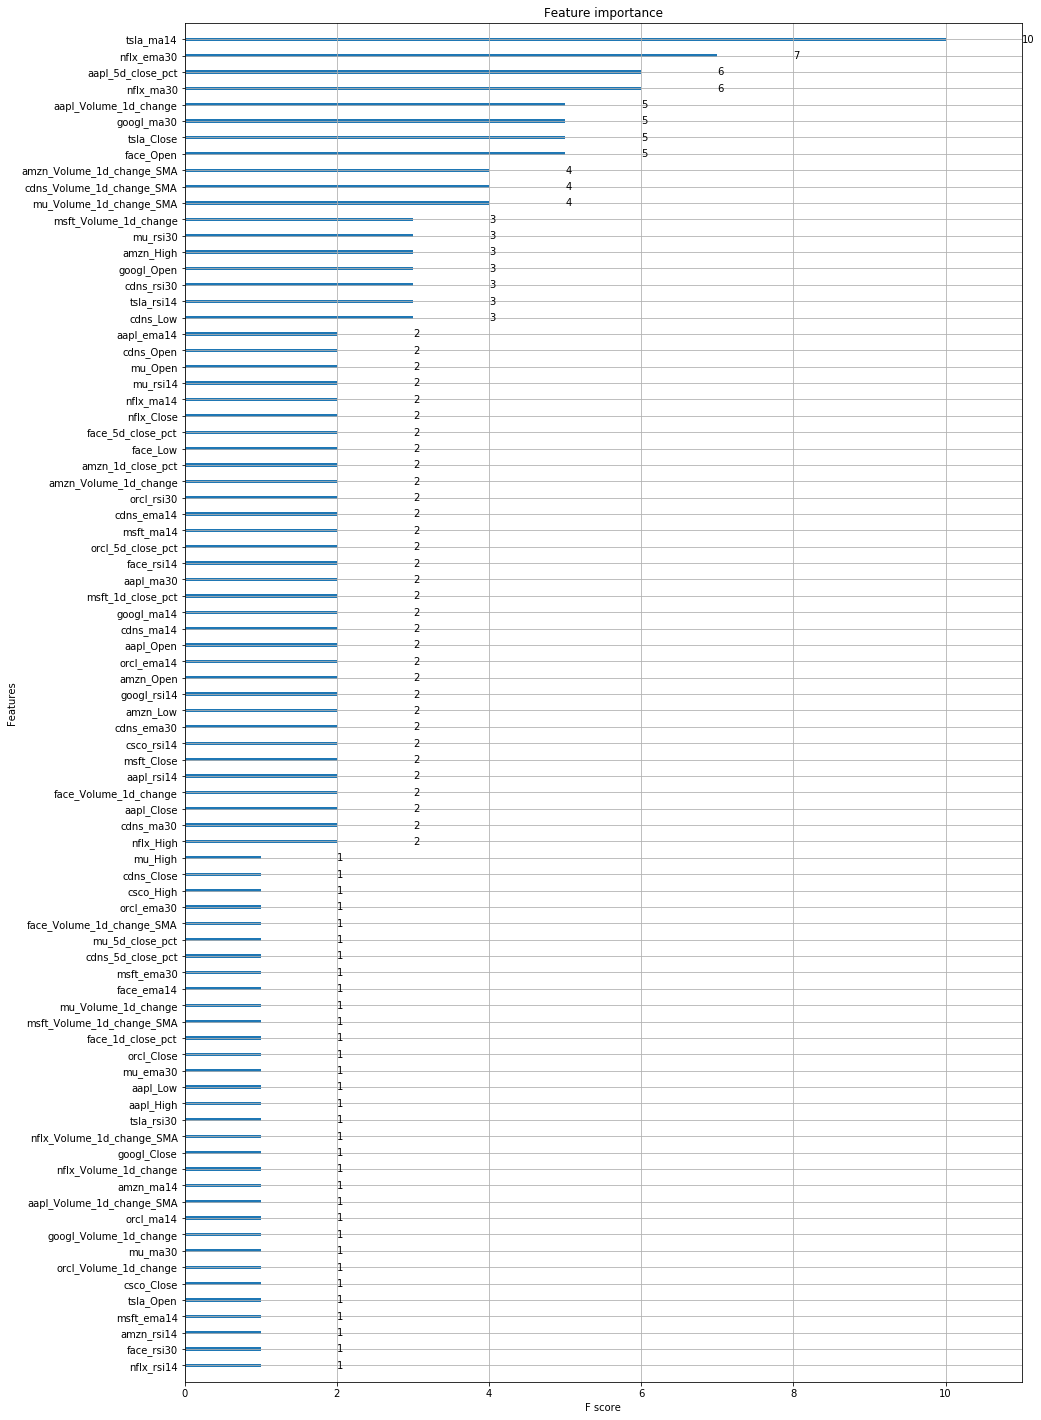

In [148]:

plt.rcParams['figure.figsize'] = [15, 25]
print(xg_clas.feature_importances_)
# plot feature importance
plot_importance(xg_clas)
plt.show()

In [38]:
pred = pd.Series(y_pred)
pred.index = y_test.index
pred.name = 'pred'
one_var_startegy = pd.merge(pred, m_table, left_index=True, right_index=True)
#tes_startegy.to_excel("google_pred2.xlsx")
#one_var_startegy.head()

## xgboost end

In [245]:
base = ['Close','5d_future_close','5d_close_future_pct',
       '4d_future_close','4d_close_future_pct',
       '3d_future_close','3d_close_future_pct',
       '2d_future_close','2d_close_future_pct',
       '1d_future_close','1d_close_future_pct']

aapl_f = ['pred']
amzn_f = ['pred']
googl_f = ['pred']
face_f = ['pred']
tsla_f = ['pred']
nflx_f = ['pred']
msft_f = ['pred']
mu_f = ['pred']
csco_f = ['pred']
orcl_f = ['pred']
cdns_f = ['pred']
gld_f = ['pred']
for i in range(len(base)):
    aapl_f.append(stock_list[0]+'_'+base[i])
for i in range(len(base)):
    amzn_f.append(stock_list[1]+'_'+base[i])
for i in range(len(base)):
    googl_f.append(stock_list[2]+'_'+base[i])
for i in range(len(base)):
    face_f.append(stock_list[3]+'_'+base[i])
for i in range(len(base)):
    tsla_f.append(stock_list[4]+'_'+base[i])
for i in range(len(base)):
    nflx_f.append(stock_list[5]+'_'+base[i])
for i in range(len(base)):
    msft_f.append(stock_list[6]+'_'+base[i])
for i in range(len(base)):
    mu_f.append(stock_list[7]+'_'+base[i])
for i in range(len(base)):
    csco_f.append(stock_list[8]+'_'+base[i])
for i in range(len(base)):
    orcl_f.append(stock_list[9]+'_'+base[i])  
for i in range(len(base)):
    cdns_f.append(stock_list[10]+'_'+base[i])
for i in range(len(base)):
    gld_f.append(stock_list[11]+'_'+base[i])

# NETFLIX FORECAST

In [81]:
final1 = one_var_startegy[nflx_f]
#final1.to_excel("mu_pred2.xlsx")

In [82]:
# Save a model into a pickle file.

pickle.dump(gbc, open("pickle_gbc_nflx", "wb"))  # save it into a file named pickle_gbc_nflx

# Load the model back from the pickle file.

pickle_gbc_nflx = pickle.load(open("pickle_gbc_nflx", "rb"))
# Use the loaded pickled model to make predictions 
pickle_gbc_nflx.predict(X_test)

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [83]:
final1['buy_and_stamp'] = final1.apply(lambda x : x['pred'] * x['nflx_Close']*1.005, axis =1)
final1['profit'] = final1.apply(lambda x : x['pred'] * x['nflx_5d_future_close'] - x['buy_and_stamp'], axis =1)

def min_date(row):
    if row['nflx_1d_close_future_pct']>0.02:
        return row['pred']*row['nflx_1d_future_close']- row['buy_and_stamp']
    elif row['nflx_2d_close_future_pct']>0.02:
        return row['pred']*row['nflx_2d_future_close']- row['buy_and_stamp']
    elif row['nflx_3d_close_future_pct']>0.02:
        return row['pred']*row['nflx_3d_future_close']- row['buy_and_stamp']
    elif row['nflx_4d_close_future_pct']>0.02:
        return row['pred']*row['nflx_4d_future_close']- row['buy_and_stamp']
    else:
        return row['pred']*row['nflx_5d_future_close']- row['buy_and_stamp']
final1['profit2'] = final1.apply(lambda row: min_date(row), axis=1)

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

In [84]:
final1.tail()

,pred,nflx_Close,nflx_5d_future_close,nflx_5d_close_future_pct,nflx_4d_future_close,nflx_4d_close_future_pct,nflx_3d_future_close,nflx_3d_close_future_pct,nflx_2d_future_close,nflx_2d_close_future_pct,nflx_1d_future_close,nflx_1d_close_future_pct,buy_and_stamp,profit,profit2
Date,,,,,,,,,,,,,,,
2019-07-26,0,335.779999,318.829987,-0.050480,319.500000,-0.048484,322.989990,-0.038090,325.929993,-0.029335,332.700012,-0.009173,0.000000,0.000000,0.000000
2019-07-29,0,332.700012,307.630005,-0.075353,318.829987,-0.041689,319.500000,-0.039675,322.989990,-0.029186,325.929993,-0.020349,0.000000,0.000000,0.000000
2019-07-30,1,325.929993,310.100006,-0.048569,307.630005,-0.056147,318.829987,-0.021784,319.500000,-0.019728,322.989990,-0.009020,327.559643,-17.459637,-17.459637
2019-07-31,0,322.989990,304.290009,-0.057896,310.100006,-0.039908,307.630005,-0.047556,318.829987,-0.012880,319.500000,-0.010805,0.000000,0.000000,0.000000
2019-08-01,1,319.500000,315.899994,-0.011268,304.290009,-0.047606,310.100006,-0.029421,307.630005,-0.037152,318.829987,-0.002097,321.097500,-5.197506,-5.197506


In [93]:
print(final1.profit.sum(),final1.profit2.sum(), '\n','sold if bought :',final1.nflx_Close.tail(1)[0] - final1.nflx_Close.head(1)[0])

103.39608322143744 -23.144016876218814 
 sold if bought : -16.160003662109375


# MU FORECAST

In [113]:
mu_f

['pred',
 'mu_Close',
 'mu_5d_future_close',
 'mu_5d_close_future_pct',
 'mu_4d_future_close',
 'mu_4d_close_future_pct',
 'mu_3d_future_close',
 'mu_3d_close_future_pct',
 'mu_2d_future_close',
 'mu_2d_close_future_pct',
 'mu_1d_future_close',
 'mu_1d_close_future_pct']

In [114]:
final1 = one_var_startegy[mu_f]
final1.head()

,pred,mu_Close,mu_5d_future_close,mu_5d_close_future_pct,mu_4d_future_close,mu_4d_close_future_pct,mu_3d_future_close,mu_3d_close_future_pct,mu_2d_future_close,mu_2d_close_future_pct,mu_1d_future_close,mu_1d_close_future_pct
Date,,,,,,,,,,,,
2019-01-28,1,38.080002,39.470001,0.036502,39.599998,0.039916,38.220001,0.003676,38.240002,0.004202,37.389999,-0.018120
2019-01-29,1,37.389999,39.369999,0.052955,39.470001,0.055630,39.599998,0.059107,38.220001,0.022198,38.240002,0.022733
2019-01-30,1,38.240002,41.520000,0.085774,39.369999,0.029550,39.470001,0.032165,39.599998,0.035565,38.220001,-0.000523
2019-01-31,1,38.220001,39.380001,0.030351,41.520000,0.086342,39.369999,0.030089,39.470001,0.032705,39.599998,0.036107
2019-02-01,0,39.599998,38.580002,-0.025757,39.380001,-0.005555,41.520000,0.048485,39.369999,-0.005808,39.470001,-0.003283


In [115]:
# Save a model into a pickle file.

pickle.dump(gbc, open("pickle_gbc_mu", "wb"))  # save it into a file named pickle_gbc_mu

# Load the model back from the pickle file.

pickle_gbc_mu = pickle.load(open("pickle_gbc_mu", "rb"))
# Use the loaded pickled model to make predictions 
pickle_gbc_mu.predict(X_test)

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [116]:
final1['buy_and_stamp'] = final1.apply(lambda x : x['pred'] * x['mu_Close']*1.005, axis =1)
final1['profit'] = final1.apply(lambda x : x['pred'] * x['mu_5d_future_close'] - x['buy_and_stamp'], axis =1)

def min_date(row):
    if row['mu_1d_close_future_pct']>0.02:
        return row['pred']*row['mu_1d_future_close']- row['buy_and_stamp']
    elif row['mu_2d_close_future_pct']>0.02:
        return row['pred']*row['mu_2d_future_close']- row['buy_and_stamp']
    elif row['mu_3d_close_future_pct']>0.02:
        return row['pred']*row['mu_3d_future_close']- row['buy_and_stamp']
    elif row['mu_4d_close_future_pct']>0.02:
        return row['pred']*row['mu_4d_future_close']- row['buy_and_stamp']
    else:
        return row['pred']*row['mu_5d_future_close']- row['buy_and_stamp']

    
    

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [117]:
final1['profit2'] = final1.apply(lambda row: min_date(row), axis=1)
final1.head()

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pred,mu_Close,mu_5d_future_close,mu_5d_close_future_pct,mu_4d_future_close,mu_4d_close_future_pct,mu_3d_future_close,mu_3d_close_future_pct,mu_2d_future_close,mu_2d_close_future_pct,mu_1d_future_close,mu_1d_close_future_pct,buy_and_stamp,profit,profit2
Date,,,,,,,,,,,,,,,
2019-01-28,1,38.080002,39.470001,0.036502,39.599998,0.039916,38.220001,0.003676,38.240002,0.004202,37.389999,-0.018120,38.270402,1.199599,1.329597
2019-01-29,1,37.389999,39.369999,0.052955,39.470001,0.055630,39.599998,0.059107,38.220001,0.022198,38.240002,0.022733,37.576949,1.793050,0.663052
2019-01-30,1,38.240002,41.520000,0.085774,39.369999,0.029550,39.470001,0.032165,39.599998,0.035565,38.220001,-0.000523,38.431202,3.088799,1.168797
2019-01-31,1,38.220001,39.380001,0.030351,41.520000,0.086342,39.369999,0.030089,39.470001,0.032705,39.599998,0.036107,38.411101,0.968900,1.188897
2019-02-01,0,39.599998,38.580002,-0.025757,39.380001,-0.005555,41.520000,0.048485,39.369999,-0.005808,39.470001,-0.003283,0.000000,0.000000,0.000000


In [118]:
print(final1.profit.sum(),final1.profit2.sum())

60.17899333953875 38.85899364471453


# AMAZON FORECAST

In [130]:
final1 = one_var_startegy[amzn_f]
final1.head()

,pred,amzn_Close,amzn_5d_future_close,amzn_5d_close_future_pct,amzn_4d_future_close,amzn_4d_close_future_pct,amzn_3d_future_close,amzn_3d_close_future_pct,amzn_2d_future_close,amzn_2d_close_future_pct,amzn_1d_future_close,amzn_1d_close_future_pct
Date,,,,,,,,,,,,
2019-01-28,1,1637.890015,1633.310059,-0.002796,1626.229980,-0.007119,1718.729980,0.049356,1670.430054,0.019867,1593.880005,-0.026870
2019-01-29,1,1593.880005,1658.810059,0.040737,1633.310059,0.024738,1626.229980,0.020296,1718.729980,0.078331,1670.430054,0.048027
2019-01-30,1,1670.430054,1640.260010,-0.018061,1658.810059,-0.006956,1633.310059,-0.022222,1626.229980,-0.026460,1718.729980,0.028915
2019-01-31,1,1718.729980,1614.369995,-0.060719,1640.260010,-0.045656,1658.810059,-0.034863,1633.310059,-0.049699,1626.229980,-0.053819
2019-02-01,1,1626.229980,1588.219971,-0.023373,1614.369995,-0.007293,1640.260010,0.008627,1658.810059,0.020034,1633.310059,0.004354


In [131]:
# Save a model into a pickle file.

pickle.dump(gbc, open("pickle_gbc_amzn", "wb"))  # save it into a file named pickle_gbc_amzn

# Load the model back from the pickle file.

pickle_gbc_amzn = pickle.load(open("pickle_gbc_amzn", "rb"))
# Use the loaded pickled model to make predictions 
pickle_gbc_amzn.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [132]:
final1['buy_and_stamp'] = final1.apply(lambda x : x['pred'] * x['amzn_Close']*1.005, axis =1)
final1['profit'] = final1.apply(lambda x : x['pred'] * x['amzn_5d_future_close'] - x['buy_and_stamp'], axis =1)

def min_date(row):
    if row['amzn_1d_close_future_pct']>0.02:
        return row['pred']*row['amzn_1d_future_close']- row['buy_and_stamp']
    elif row['amzn_2d_close_future_pct']>0.02:
        return row['pred']*row['amzn_2d_future_close']- row['buy_and_stamp']
    elif row['amzn_3d_close_future_pct']>0.02:
        return row['pred']*row['amzn_3d_future_close']- row['buy_and_stamp']
    elif row['amzn_4d_close_future_pct']>0.02:
        return row['pred']*row['amzn_4d_future_close']- row['buy_and_stamp']
    else:
        return row['pred']*row['amzn_5d_future_close']- row['buy_and_stamp']

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [133]:
final1['profit2'] = final1.apply(lambda row: min_date(row), axis=1)

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
final1.tail()

,pred,amzn_Close,amzn_5d_future_close,amzn_5d_close_future_pct,amzn_4d_future_close,amzn_4d_close_future_pct,amzn_3d_future_close,amzn_3d_close_future_pct,amzn_2d_future_close,amzn_2d_close_future_pct,amzn_1d_future_close,amzn_1d_close_future_pct,buy_and_stamp,profit,profit2
Date,,,,,,,,,,,,,,,
2019-07-26,1,1943.050049,1823.239990,-0.061661,1855.319946,-0.045151,1866.780029,-0.039253,1898.530029,-0.022912,1912.449951,-0.015748,1952.765299,-129.525309,-129.525309
2019-07-29,1,1912.449951,1765.130005,-0.077032,1823.239990,-0.046647,1855.319946,-0.029873,1866.780029,-0.023880,1898.530029,-0.007279,1922.012201,-156.882196,-156.882196
2019-07-30,1,1898.530029,1787.829956,-0.058308,1765.130005,-0.070265,1823.239990,-0.039657,1855.319946,-0.022760,1866.780029,-0.016723,1908.022679,-120.192723,-120.192723
2019-07-31,1,1866.780029,1793.400024,-0.039308,1787.829956,-0.042292,1765.130005,-0.054452,1823.239990,-0.023324,1855.319946,-0.006139,1876.113929,-82.713905,-82.713905
2019-08-01,1,1855.319946,1832.890015,-0.012090,1793.400024,-0.033374,1787.829956,-0.036376,1765.130005,-0.048612,1823.239990,-0.017291,1864.596546,-31.706531,-31.706531


In [135]:
print(final1.profit.sum(),final1.profit2.sum())

351.1461358642739 357.5664239502114


# APPLE FORECAST

In [146]:
final1 = one_var_startegy[aapl_f]
final1.head()

,pred,aapl_Close,aapl_5d_future_close,aapl_5d_close_future_pct,aapl_4d_future_close,aapl_4d_close_future_pct,aapl_3d_future_close,aapl_3d_close_future_pct,aapl_2d_future_close,aapl_2d_close_future_pct,aapl_1d_future_close,aapl_1d_close_future_pct
Date,,,,,,,,,,,,
2019-01-28,1,156.300003,171.250000,0.095649,166.520004,0.065387,166.440002,0.064875,165.250000,0.057262,154.679993,-0.010365
2019-01-29,1,154.679993,174.179993,0.126067,171.250000,0.107124,166.520004,0.076545,166.440002,0.076028,165.250000,0.068335
2019-01-30,1,165.250000,174.240005,0.054402,174.179993,0.054039,171.250000,0.036309,166.520004,0.007685,166.440002,0.007201
2019-01-31,1,166.440002,170.940002,0.027037,174.240005,0.046864,174.179993,0.046503,171.250000,0.028899,166.520004,0.000481
2019-02-01,1,166.520004,170.410004,0.023361,170.940002,0.026543,174.240005,0.046361,174.179993,0.046000,171.250000,0.028405


In [147]:
# Save a model into a pickle file.

pickle.dump(gbc, open("pickle_gbc_aapl", "wb"))  # save it into a file named pickle_gbc_aapl

# Load the model back from the pickle file.

pickle_gbc_aapl = pickle.load(open("pickle_gbc_aapl", "rb"))
# Use the loaded pickled model to make predictions 
pickle_gbc_aapl.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [148]:
final1['buy_and_stamp'] = final1.apply(lambda x : x['pred'] * x['aapl_Close']*1.005, axis =1)
final1['profit'] = final1.apply(lambda x : x['pred'] * x['aapl_5d_future_close'] - x['buy_and_stamp'], axis =1)

def min_date(row):
    if row['aapl_1d_close_future_pct']>0.02:
        return row['pred']*row['aapl_1d_future_close']- row['buy_and_stamp']
    elif row['aapl_2d_close_future_pct']>0.02:
        return row['pred']*row['aapl_2d_future_close']- row['buy_and_stamp']
    elif row['aapl_3d_close_future_pct']>0.02:
        return row['pred']*row['aapl_3d_future_close']- row['buy_and_stamp']
    elif row['aapl_4d_close_future_pct']>0.02:
        return row['pred']*row['aapl_4d_future_close']- row['buy_and_stamp']
    else:
        return row['pred']*row['aapl_5d_future_close']- row['buy_and_stamp']

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [149]:
final1['profit2'] = final1.apply(lambda row: min_date(row), axis=1)
final1.tail()

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pred,aapl_Close,aapl_5d_future_close,aapl_5d_close_future_pct,aapl_4d_future_close,aapl_4d_close_future_pct,aapl_3d_future_close,aapl_3d_close_future_pct,aapl_2d_future_close,aapl_2d_close_future_pct,aapl_1d_future_close,aapl_1d_close_future_pct,buy_and_stamp,profit,profit2
Date,,,,,,,,,,,,,,,
2019-07-26,1,207.740005,204.020004,-0.017907,208.429993,0.003321,213.039993,0.025513,208.779999,0.005006,209.679993,0.009339,208.778706,-4.758701,4.261288
2019-07-29,0,209.679993,193.339996,-0.077928,204.020004,-0.026993,208.429993,-0.005961,213.039993,0.016024,208.779999,-0.004292,0.000000,0.000000,0.000000
2019-07-30,0,208.779999,197.000000,-0.056423,193.339996,-0.073953,204.020004,-0.022799,208.429993,-0.001676,213.039993,0.020404,0.000000,0.000000,0.000000
2019-07-31,0,213.039993,199.039993,-0.065715,197.000000,-0.075291,193.339996,-0.092471,204.020004,-0.042339,208.429993,-0.021639,0.000000,0.000000,0.000000
2019-08-01,1,208.429993,203.429993,-0.023989,199.039993,-0.045051,197.000000,-0.054839,193.339996,-0.072398,204.020004,-0.021158,209.472143,-6.042150,-6.042150


In [150]:
print(final1.profit.sum(),final1.profit2.sum())

171.190776824953 119.02077865600768


# GOOGLE FORECAST

In [161]:
final1 = one_var_startegy[googl_f]
final1.head()

,pred,googl_Close,googl_5d_future_close,googl_5d_close_future_pct,googl_4d_future_close,googl_4d_close_future_pct,googl_3d_future_close,googl_3d_close_future_pct,googl_2d_future_close,googl_2d_close_future_pct,googl_1d_future_close,googl_1d_close_future_pct
Date,,,,,,,,,,,,
2019-01-28,1,1079.859985,1141.420044,0.057007,1118.619995,0.035894,1125.890015,0.042626,1097.989990,0.016789,1070.060059,-0.009075
2019-01-29,1,1070.060059,1151.869995,0.076454,1141.420044,0.066688,1118.619995,0.045381,1125.890015,0.052175,1097.989990,0.026101
2019-01-30,1,1097.989990,1122.890015,0.022678,1151.869995,0.049071,1141.420044,0.039554,1118.619995,0.018789,1125.890015,0.025410
2019-01-31,0,1125.890015,1105.910034,-0.017746,1122.890015,-0.002665,1151.869995,0.023075,1141.420044,0.013794,1118.619995,-0.006457
2019-02-01,1,1118.619995,1102.380005,-0.014518,1105.910034,-0.011362,1122.890015,0.003817,1151.869995,0.029724,1141.420044,0.020382


In [162]:
# Save a model into a pickle file.

pickle.dump(gbc, open("pickle_gbc_googl", "wb"))  # save it into a file named pickle_gbc_googl

# Load the model back from the pickle file.

pickle_gbc_googl = pickle.load(open("pickle_gbc_googl", "rb"))
# Use the loaded pickled model to make predictions 
pickle_gbc_googl.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [163]:
final1['buy_and_stamp'] = final1.apply(lambda x : x['pred'] * x['googl_Close']*1.005, axis =1)
final1['profit'] = final1.apply(lambda x : x['pred'] * x['googl_5d_future_close'] - x['buy_and_stamp'], axis =1)

def min_date(row):
    if row['googl_1d_close_future_pct']>0.02:
        return row['pred']*row['googl_1d_future_close']- row['buy_and_stamp']
    elif row['googl_2d_close_future_pct']>0.02:
        return row['pred']*row['googl_2d_future_close']- row['buy_and_stamp']
    elif row['googl_3d_close_future_pct']>0.02:
        return row['pred']*row['googl_3d_future_close']- row['buy_and_stamp']
    elif row['googl_4d_close_future_pct']>0.02:
        return row['pred']*row['googl_4d_future_close']- row['buy_and_stamp']
    else:
        return row['pred']*row['googl_5d_future_close']- row['buy_and_stamp']

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [164]:
final1['profit2'] = final1.apply(lambda row: min_date(row), axis=1)
final1.tail()

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pred,googl_Close,googl_5d_future_close,googl_5d_close_future_pct,googl_4d_future_close,googl_4d_close_future_pct,googl_3d_future_close,googl_3d_close_future_pct,googl_2d_future_close,googl_2d_close_future_pct,googl_1d_future_close,googl_1d_close_future_pct,buy_and_stamp,profit,profit2
Date,,,,,,,,,,,,,,,
2019-07-26,0,1245.219971,1196.319946,-0.039270,1211.780029,-0.026855,1218.199951,-0.021699,1228.000000,-0.013829,1241.839966,-0.002714,0.000000,0.000000,0.000000
2019-07-29,0,1241.839966,1154.750000,-0.070130,1196.319946,-0.036655,1211.780029,-0.024206,1218.199951,-0.019036,1228.000000,-0.011145,0.000000,0.000000,0.000000
2019-07-30,0,1228.000000,1171.079956,-0.046352,1154.750000,-0.059650,1196.319946,-0.025798,1211.780029,-0.013208,1218.199951,-0.007980,0.000000,0.000000,0.000000
2019-07-31,0,1218.199951,1175.910034,-0.034715,1171.079956,-0.038680,1154.750000,-0.052085,1196.319946,-0.017961,1211.780029,-0.005270,0.000000,0.000000,0.000000
2019-08-01,1,1211.780029,1206.189941,-0.004613,1175.910034,-0.029601,1171.079956,-0.033587,1154.750000,-0.047063,1196.319946,-0.012758,1217.838929,-11.648988,-11.648988


In [165]:
print(final1.profit.sum(),final1.profit2.sum())

970.3282800293039 881.9282556152414


# FACEBOOK FORECAST

In [176]:
final1 = one_var_startegy[face_f]
final1.head()

,pred,face_Close,face_5d_future_close,face_5d_close_future_pct,face_4d_future_close,face_4d_close_future_pct,face_3d_future_close,face_3d_close_future_pct,face_2d_future_close,face_2d_close_future_pct,face_1d_future_close,face_1d_close_future_pct
Date,,,,,,,,,,,,
2019-01-28,1,147.470001,169.250000,0.147691,165.710007,0.123686,166.690002,0.130332,150.419998,0.020004,144.190002,-0.022242
2019-01-29,1,144.190002,171.160004,0.187045,169.250000,0.173798,165.710007,0.149248,166.690002,0.156044,150.419998,0.043207
2019-01-30,0,150.419998,170.490005,0.133426,171.160004,0.137881,169.250000,0.125183,165.710007,0.101649,166.690002,0.108164
2019-01-31,1,166.690002,166.380005,-0.001860,170.490005,0.022797,171.160004,0.026816,169.250000,0.015358,165.710007,-0.005879
2019-02-01,1,165.710007,167.330002,0.009776,166.380005,0.004043,170.490005,0.028846,171.160004,0.032889,169.250000,0.021363


In [177]:
# Save a model into a pickle file.

pickle.dump(gbc, open("pickle_gbc_face", "wb"))  # save it into a file named pickle_gbc_face

# Load the model back from the pickle file.

pickle_gbc_face = pickle.load(open("pickle_gbc_face", "rb"))
# Use the loaded pickled model to make predictions 
pickle_gbc_face.predict(X_test)

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [178]:
final1['buy_and_stamp'] = final1.apply(lambda x : x['pred'] * x['face_Close']*1.005, axis =1)
final1['profit'] = final1.apply(lambda x : x['pred'] * x['face_5d_future_close'] - x['buy_and_stamp'], axis =1)

def min_date(row):
    if row['face_1d_close_future_pct']>0.02:
        return row['pred']*row['face_1d_future_close']- row['buy_and_stamp']
    elif row['face_2d_close_future_pct']>0.02:
        return row['pred']*row['face_2d_future_close']- row['buy_and_stamp']
    elif row['face_3d_close_future_pct']>0.02:
        return row['pred']*row['face_3d_future_close']- row['buy_and_stamp']
    elif row['face_4d_close_future_pct']>0.02:
        return row['pred']*row['face_4d_future_close']- row['buy_and_stamp']
    else:
        return row['pred']*row['face_5d_future_close']- row['buy_and_stamp']

final1['profit2'] = final1.apply(lambda row: min_date(row), axis=1)
final1.tail()

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

,pred,face_Close,face_5d_future_close,face_5d_close_future_pct,face_4d_future_close,face_4d_close_future_pct,face_3d_future_close,face_3d_close_future_pct,face_2d_future_close,face_2d_close_future_pct,face_1d_future_close,face_1d_close_future_pct,buy_and_stamp,profit,profit2
Date,,,,,,,,,,,,,,,
2019-07-26,0,199.750000,189.020004,-0.053717,192.729996,-0.035144,194.229996,-0.027635,197.039993,-0.013567,195.940002,-0.019074,0.000000,0.000000,0.000000
2019-07-29,1,195.940002,181.729996,-0.072522,189.020004,-0.035317,192.729996,-0.016383,194.229996,-0.008727,197.039993,0.005614,196.919702,-15.189707,-15.189707
2019-07-30,0,197.039993,184.509995,-0.063591,181.729996,-0.077700,189.020004,-0.040702,192.729996,-0.021874,194.229996,-0.014261,0.000000,0.000000,0.000000
2019-07-31,0,194.229996,185.149994,-0.046749,184.509995,-0.050044,181.729996,-0.064357,189.020004,-0.026824,192.729996,-0.007723,0.000000,0.000000,0.000000
2019-08-01,0,192.729996,190.160004,-0.013335,185.149994,-0.039330,184.509995,-0.042650,181.729996,-0.057075,189.020004,-0.019250,0.000000,0.000000,0.000000


In [179]:
print(final1.profit.sum(),final1.profit2.sum())

84.82690315246654 44.01687507629467


# TESLA FORECAST

In [190]:
final1 = one_var_startegy[tsla_f]


In [191]:
# Save a model into a pickle file.

pickle.dump(gbc, open("pickle_gbc_tsla", "wb"))  # save it into a file named pickle_gbc_tsla

# Load the model back from the pickle file.

pickle_gbc_tsla = pickle.load(open("pickle_gbc_tsla", "rb"))
# Use the loaded pickled model to make predictions 
pickle_gbc_tsla.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [192]:
final1['buy_and_stamp'] = final1.apply(lambda x : x['pred'] * x['tsla_Close']*1.005, axis =1)
final1['profit'] = final1.apply(lambda x : x['pred'] * x['tsla_5d_future_close'] - x['buy_and_stamp'], axis =1)

def min_date(row):
    if row['tsla_1d_close_future_pct']>0.02:
        return row['pred']*row['tsla_1d_future_close']- row['buy_and_stamp']
    elif row['tsla_2d_close_future_pct']>0.02:
        return row['pred']*row['tsla_2d_future_close']- row['buy_and_stamp']
    elif row['tsla_3d_close_future_pct']>0.02:
        return row['pred']*row['tsla_3d_future_close']- row['buy_and_stamp']
    elif row['tsla_4d_close_future_pct']>0.02:
        return row['pred']*row['tsla_4d_future_close']- row['buy_and_stamp']
    else:
        return row['pred']*row['tsla_5d_future_close']- row['buy_and_stamp']

final1['profit2'] = final1.apply(lambda row: min_date(row), axis=1)
final1.tail()

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

,pred,tsla_Close,tsla_5d_future_close,tsla_5d_close_future_pct,tsla_4d_future_close,tsla_4d_close_future_pct,tsla_3d_future_close,tsla_3d_close_future_pct,tsla_2d_future_close,tsla_2d_close_future_pct,tsla_1d_future_close,tsla_1d_close_future_pct,buy_and_stamp,profit,profit2
Date,,,,,,,,,,,,,,,
2019-07-26,1,228.039993,234.339996,0.027627,233.850006,0.025478,241.610001,0.059507,242.259995,0.062357,235.770004,0.033898,229.180193,5.159803,6.589811
2019-07-29,1,235.770004,228.320007,-0.031599,234.339996,-0.006065,233.850006,-0.008144,241.610001,0.024770,242.259995,0.027527,236.948854,-8.628847,5.311140
2019-07-30,1,242.259995,230.750000,-0.047511,228.320007,-0.057541,234.339996,-0.032692,233.850006,-0.034715,241.610001,-0.002683,243.471294,-12.721294,-12.721294
2019-07-31,1,241.610001,233.419998,-0.033898,230.750000,-0.044948,228.320007,-0.055006,234.339996,-0.030090,233.850006,-0.032118,242.818051,-9.398052,-9.398052
2019-08-01,1,233.850006,238.300003,0.019029,233.419998,-0.001839,230.750000,-0.013256,228.320007,-0.023648,234.339996,0.002095,235.019256,3.280747,3.280747


In [193]:
print(final1.profit.sum(),final1.profit2.sum())

141.71857620239416 22.248529205323848


In [29]:
# Save the xg model into a pickle file.

pickle.dump(xg_clas, open("pickle_xg_clas_tsla", "wb"))  # save it into a file named pickle_gbc_tsla

# Load the model back from the pickle file.

pickle_xg_clas_tsla = pickle.load(open("pickle_xg_clas_tsla", "rb"))
# Use the loaded pickled model to make predictions 
pickle_xg_clas_tsla.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [30]:
final1['buy_and_stamp'] = final1.apply(lambda x : x['pred'] * x['tsla_Close']*1.005, axis =1)
final1['profit'] = final1.apply(lambda x : x['pred'] * x['tsla_5d_future_close'] - x['buy_and_stamp'], axis =1)

def min_date(row):
    if row['tsla_1d_close_future_pct']>0.02:
        return row['pred']*row['tsla_1d_future_close']- row['buy_and_stamp']
    elif row['tsla_2d_close_future_pct']>0.02:
        return row['pred']*row['tsla_2d_future_close']- row['buy_and_stamp']
    elif row['tsla_3d_close_future_pct']>0.02:
        return row['pred']*row['tsla_3d_future_close']- row['buy_and_stamp']
    elif row['tsla_4d_close_future_pct']>0.02:
        return row['pred']*row['tsla_4d_future_close']- row['buy_and_stamp']
    else:
        return row['pred']*row['tsla_5d_future_close']- row['buy_and_stamp']

final1['profit2'] = final1.apply(lambda row: min_date(row), axis=1)
print('xg model: ',final1.profit.sum(),final1.profit2.sum())

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


xg model:  48.92008789062689 -43.32988159179499


C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


# MICROSOFT FORECAST

In [204]:
final1 = one_var_startegy[msft_f]

In [205]:
# Save a model into a pickle file.

pickle.dump(gbc, open("pickle_gbc_msft", "wb"))  # save it into a file named pickle_gbc_msft

# Load the model back from the pickle file.

pickle_gbc_msft = pickle.load(open("pickle_gbc_msft", "rb"))
# Use the loaded pickled model to make predictions 
pickle_gbc_msft.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [206]:
final1['buy_and_stamp'] = final1.apply(lambda x : x['pred'] * x['msft_Close']*1.005, axis =1)
final1['profit'] = final1.apply(lambda x : x['pred'] * x['msft_5d_future_close'] - x['buy_and_stamp'], axis =1)

def min_date(row):
    if row['msft_1d_close_future_pct']>0.02:
        return row['pred']*row['msft_1d_future_close']- row['buy_and_stamp']
    elif row['msft_2d_close_future_pct']>0.02:
        return row['pred']*row['msft_2d_future_close']- row['buy_and_stamp']
    elif row['msft_3d_close_future_pct']>0.02:
        return row['pred']*row['msft_3d_future_close']- row['buy_and_stamp']
    elif row['msft_4d_close_future_pct']>0.02:
        return row['pred']*row['msft_4d_future_close']- row['buy_and_stamp']
    else:
        return row['pred']*row['msft_5d_future_close']- row['buy_and_stamp']

final1['profit2'] = final1.apply(lambda row: min_date(row), axis=1)
final1.tail()

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

,pred,msft_Close,msft_5d_future_close,msft_5d_close_future_pct,msft_4d_future_close,msft_4d_close_future_pct,msft_3d_future_close,msft_3d_close_future_pct,msft_2d_future_close,msft_2d_close_future_pct,msft_1d_future_close,msft_1d_close_future_pct,buy_and_stamp,profit,profit2
Date,,,,,,,,,,,,,,,
2019-07-26,1,141.339996,136.899994,-0.031414,138.059998,-0.023206,136.270004,-0.035871,140.350006,-0.007004,141.029999,-0.002193,142.046696,-5.146702,-5.146702
2019-07-29,1,141.029999,132.210007,-0.062540,136.899994,-0.029285,138.059998,-0.021059,136.270004,-0.033752,140.350006,-0.004822,141.735149,-9.525142,-9.525142
2019-07-30,1,140.350006,134.690002,-0.040328,132.210007,-0.057998,136.899994,-0.024581,138.059998,-0.016316,136.270004,-0.029070,141.051756,-6.361754,-6.361754
2019-07-31,1,136.270004,135.279999,-0.007265,134.690002,-0.011595,132.210007,-0.029794,136.899994,0.004623,138.059998,0.013136,136.951354,-1.671356,-1.671356
2019-08-01,1,138.059998,138.889999,0.006012,135.279999,-0.020136,134.690002,-0.024410,132.210007,-0.042373,136.899994,-0.008402,138.750298,0.139702,0.139702


In [207]:
print(final1.profit.sum(),final1.profit2.sum())

84.06311428070178 46.903102989197876


# CISCO FORECAST

In [218]:
final1 = one_var_startegy[csco_f]

In [219]:
# Save a model into a pickle file.

pickle.dump(gbc, open("pickle_gbc_csco", "wb"))  # save it into a file named pickle_gbc_csco

# Load the model back from the pickle file.

pickle_gbc_csco = pickle.load(open("pickle_gbc_csco", "rb"))
# Use the loaded pickled model to make predictions 
pickle_gbc_csco.predict(X_test)

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1],
      dtype=int64)

In [220]:
final1['buy_and_stamp'] = final1.apply(lambda x : x['pred'] * x['csco_Close']*1.005, axis =1)
final1['profit'] = final1.apply(lambda x : x['pred'] * x['csco_5d_future_close'] - x['buy_and_stamp'], axis =1)

def min_date(row):
    if row['csco_1d_close_future_pct']>0.02:
        return row['pred']*row['csco_1d_future_close']- row['buy_and_stamp']
    elif row['csco_2d_close_future_pct']>0.02:
        return row['pred']*row['csco_2d_future_close']- row['buy_and_stamp']
    elif row['csco_3d_close_future_pct']>0.02:
        return row['pred']*row['csco_3d_future_close']- row['buy_and_stamp']
    elif row['csco_4d_close_future_pct']>0.02:
        return row['pred']*row['csco_4d_future_close']- row['buy_and_stamp']
    else:
        return row['pred']*row['csco_5d_future_close']- row['buy_and_stamp']

final1['profit2'] = final1.apply(lambda row: min_date(row), axis=1)
final1.tail()

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

,pred,csco_Close,csco_5d_future_close,csco_5d_close_future_pct,csco_4d_future_close,csco_4d_close_future_pct,csco_3d_future_close,csco_3d_close_future_pct,csco_2d_future_close,csco_2d_close_future_pct,csco_1d_future_close,csco_1d_close_future_pct,buy_and_stamp,profit,profit2
Date,,,,,,,,,,,,,,,
2019-07-26,1,56.529999,53.250000,-0.058022,55.389999,-0.020166,55.400002,-0.019989,56.470001,-0.001061,56.930000,0.007076,56.812649,-3.562649,-3.562649
2019-07-29,0,56.930000,51.369999,-0.097664,53.250000,-0.064641,55.389999,-0.027051,55.400002,-0.026875,56.470001,-0.008080,0.000000,0.000000,0.000000
2019-07-30,1,56.470001,52.599998,-0.068532,51.369999,-0.090313,53.250000,-0.057021,55.389999,-0.019125,55.400002,-0.018948,56.752351,-4.152353,-4.152353
2019-07-31,1,55.400002,52.340000,-0.055235,52.599998,-0.050542,51.369999,-0.072744,53.250000,-0.038809,55.389999,-0.000181,55.677002,-3.337001,-3.337001
2019-08-01,1,55.389999,53.160000,-0.040260,52.340000,-0.055064,52.599998,-0.050370,51.369999,-0.072576,53.250000,-0.038635,55.666949,-2.506950,-2.506950


In [221]:
print(final1.profit.sum(),final1.profit2.sum())

37.76769756317177 25.057709922790913


In [40]:
# Save the xg model into a pickle file.

pickle.dump(xg_clas, open("pickle_xg_clas_csco", "wb"))  # save it into a file named pickle_gbc_csco

# Load the model back from the pickle file.

pickle_xg_clas_csco = pickle.load(open("pickle_xg_clas_csco", "rb"))
# Use the loaded pickled model to make predictions 
pickle_xg_clas_csco.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [43]:
final1['buy_and_stamp'] = final1.apply(lambda x : x['pred'] * x['csco_Close']*1.005, axis =1)
final1['profit'] = final1.apply(lambda x : x['pred'] * x['csco_5d_future_close'] - x['buy_and_stamp'], axis =1)

def min_date(row):
    if row['csco_1d_close_future_pct']>0.02:
        return row['pred']*row['csco_1d_future_close']- row['buy_and_stamp']
    elif row['csco_2d_close_future_pct']>0.02:
        return row['pred']*row['csco_2d_future_close']- row['buy_and_stamp']
    elif row['csco_3d_close_future_pct']>0.02:
        return row['pred']*row['csco_3d_future_close']- row['buy_and_stamp']
    elif row['csco_4d_close_future_pct']>0.02:
        return row['pred']*row['csco_4d_future_close']- row['buy_and_stamp']
    else:
        return row['pred']*row['csco_5d_future_close']- row['buy_and_stamp']

final1['profit2'] = final1.apply(lambda row: min_date(row), axis=1)
print('xg model: ',final1.profit.sum(),final1.profit2.sum())

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


xg model:  23.311597881317418 17.061609325409215


C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


# ORACLE FORECAST

In [232]:
final1 = one_var_startegy[orcl_f]

In [233]:
# Save a model into a pickle file.

pickle.dump(gbc, open("pickle_gbc_orcl", "wb"))  # save it into a file named pickle_gbc_orcl

# Load the model back from the pickle file.

pickle_gbc_orcl = pickle.load(open("pickle_gbc_orcl", "rb"))
# Use the loaded pickled model to make predictions 
pickle_gbc_orcl.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [234]:
final1['buy_and_stamp'] = final1.apply(lambda x : x['pred'] * x['orcl_Close']*1.005, axis =1)
final1['profit'] = final1.apply(lambda x : x['pred'] * x['orcl_5d_future_close'] - x['buy_and_stamp'], axis =1)

def min_date(row):
    if row['orcl_1d_close_future_pct']>0.02:
        return row['pred']*row['orcl_1d_future_close']- row['buy_and_stamp']
    elif row['orcl_2d_close_future_pct']>0.02:
        return row['pred']*row['orcl_2d_future_close']- row['buy_and_stamp']
    elif row['orcl_3d_close_future_pct']>0.02:
        return row['pred']*row['orcl_3d_future_close']- row['buy_and_stamp']
    elif row['orcl_4d_close_future_pct']>0.02:
        return row['pred']*row['orcl_4d_future_close']- row['buy_and_stamp']
    else:
        return row['pred']*row['orcl_5d_future_close']- row['buy_and_stamp']

final1['profit2'] = final1.apply(lambda row: min_date(row), axis=1)
final1.tail()

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

,pred,orcl_Close,orcl_5d_future_close,orcl_5d_close_future_pct,orcl_4d_future_close,orcl_4d_close_future_pct,orcl_3d_future_close,orcl_3d_close_future_pct,orcl_2d_future_close,orcl_2d_close_future_pct,orcl_1d_future_close,orcl_1d_close_future_pct,buy_and_stamp,profit,profit2
Date,,,,,,,,,,,,,,,
2019-07-26,0,58.500000,55.840000,-0.045470,55.880001,-0.044786,56.299999,-0.037607,57.490002,-0.017265,58.060001,-0.007521,0.000000,0.0000,0.0000
2019-07-29,0,58.060001,53.759998,-0.074061,55.840000,-0.038236,55.880001,-0.037547,56.299999,-0.030314,57.490002,-0.009817,0.000000,0.0000,0.0000
2019-07-30,0,57.490002,53.959999,-0.061402,53.759998,-0.064881,55.840000,-0.028701,55.880001,-0.028005,56.299999,-0.020699,0.000000,0.0000,0.0000
2019-07-31,0,56.299999,53.340000,-0.052575,53.959999,-0.041563,53.759998,-0.045115,55.840000,-0.008170,55.880001,-0.007460,0.000000,0.0000,0.0000
2019-08-01,1,55.880001,54.650002,-0.022011,53.340000,-0.045455,53.959999,-0.034359,53.759998,-0.037938,55.840000,-0.000716,56.159401,-1.5094,-1.5094


In [235]:
print(final1.profit.sum(),final1.profit2.sum())

32.831840667724926 28.321849975586254


# CDNS FOREECAST

In [246]:
final1 = one_var_startegy[cdns_f]

In [247]:
# Save a model into a pickle file.

pickle.dump(gbc, open("pickle_gbc_cdns", "wb"))  # save it into a file named pickle_gbc_cdns

# Load the model back from the pickle file.

pickle_gbc_cdns = pickle.load(open("pickle_gbc_cdns", "rb"))
# Use the loaded pickled model to make predictions 
pickle_gbc_cdns.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [248]:
final1['buy_and_stamp'] = final1.apply(lambda x : x['pred'] * x['cdns_Close']*1.005, axis =1)
final1['profit'] = final1.apply(lambda x : x['pred'] * x['cdns_5d_future_close'] - x['buy_and_stamp'], axis =1)

def min_date(row):
    if row['cdns_1d_close_future_pct']>0.02:
        return row['pred']*row['cdns_1d_future_close']- row['buy_and_stamp']
    elif row['cdns_2d_close_future_pct']>0.02:
        return row['pred']*row['cdns_2d_future_close']- row['buy_and_stamp']
    elif row['cdns_3d_close_future_pct']>0.02:
        return row['pred']*row['cdns_3d_future_close']- row['buy_and_stamp']
    elif row['cdns_4d_close_future_pct']>0.02:
        return row['pred']*row['cdns_4d_future_close']- row['buy_and_stamp']
    else:
        return row['pred']*row['cdns_5d_future_close']- row['buy_and_stamp']

final1['profit2'] = final1.apply(lambda row: min_date(row), axis=1)
final1.tail()

C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gergo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

,pred,cdns_Close,cdns_5d_future_close,cdns_5d_close_future_pct,cdns_4d_future_close,cdns_4d_close_future_pct,cdns_3d_future_close,cdns_3d_close_future_pct,cdns_2d_future_close,cdns_2d_close_future_pct,cdns_1d_future_close,cdns_1d_close_future_pct,buy_and_stamp,profit,profit2
Date,,,,,,,,,,,,,,,
2019-07-26,1,75.910004,71.269997,-0.061125,73.040001,-0.037808,73.910004,-0.026347,75.540001,-0.004874,76.349998,0.005796,76.289554,-5.019557,-5.019557
2019-07-29,1,76.349998,67.500000,-0.115914,71.269997,-0.066536,73.040001,-0.043353,73.910004,-0.031958,75.540001,-0.010609,76.731748,-9.231748,-9.231748
2019-07-30,0,75.540001,69.150002,-0.084591,67.500000,-0.106434,71.269997,-0.056526,73.040001,-0.033095,73.910004,-0.021578,0.000000,0.000000,0.000000
2019-07-31,1,73.910004,68.930000,-0.067379,69.150002,-0.064403,67.500000,-0.086727,71.269997,-0.035719,73.040001,-0.011771,74.279554,-5.349553,-5.349553
2019-08-01,1,73.040001,71.389999,-0.022590,68.930000,-0.056271,69.150002,-0.053258,67.500000,-0.075849,71.269997,-0.024233,73.405201,-2.015202,-2.015202


In [249]:
print(final1.profit.sum(),final1.profit2.sum())

76.82986474990915 48.899837741852515


# THE LATEST RECORDS (last 5!)


In [17]:
# main function to create the necessary variables for any Symbols
# for the last 5 days we need more at first (RSI and MA). Filter out only at the end
def stock_bring_tail(symb):
   tbl1 = pdr.get_data_yahoo(symb, 
                          start=sdate, 
                          end=edate)
   # Create 5 and 3-day % changes of Close for the current day, and 5 days in the future
      
   tbl1['5d_close_pct'] = tbl1['Close'].pct_change(5) # the actual price change compared to the 5 days ago one
   tbl1['1d_close_pct'] = tbl1['Close'].pct_change(1) # the actual price change compared to the 1 days ago one
    
    
    
   feature_names = ['High', 'Low', 'Open', 'Close', '5d_close_pct', '1d_close_pct']  # a list of the feature names for later

   # Create moving averages and rsi for timeperiods of 14, 30
   for n in [14,30]:

        # Create the moving average indicator and divide by Close
        tbl1['ma' + str(n)] = talib.SMA(tbl1['Close'].values,
                              timeperiod=n) / tbl1['Close']
        # Create the exponential moving average indicator and divide by Close
        tbl1['ema' + str(n)] = talib.EMA(tbl1['Close'].values,
                              timeperiod=n) / tbl1['Close']
        # Create the RSI indicator
        tbl1['rsi' + str(n)] = talib.RSI(tbl1['Close'].values, timeperiod= n)
    
        # Add rsi and moving average to the feature name list
        feature_names = feature_names + ['ma' + str(n), 'ema' + str(n), 'rsi' + str(n)]
   tbl1 = tbl1.dropna()
   new_features = ['Volume_1d_change', 'Volume_1d_change_SMA']
   feature_names.extend(new_features)
   tbl1['Volume_1d_change'] = tbl1['Volume'].pct_change()
   tbl1['Volume_1d_change_SMA'] = talib.SMA(tbl1['Volume_1d_change'].values,
                        timeperiod=5)
    

   return tbl1, feature_names

In [18]:
sdate = datetime.datetime(2019, 1, 1)
edate = datetime.datetime(2019, 8, 14)
aapl_x, aapl_features_x = stock_bring_tail('AAPL')
amzn_x, amzn_features_x  = stock_bring_tail('AMZN')
googl_x, googl_features_x  = stock_bring_tail('GOOGL')
face_x, face_features_x  = stock_bring_tail('FB')
tsla_x, tsla_features_x  = stock_bring_tail('TSLA')
nflx_x, nflx_features_x  = stock_bring_tail('NFLX')
msft_x, msft_features_x  = stock_bring_tail('MSFT')
mu_x, mu_features_x  = stock_bring_tail('MU')
csco_x, csco_features_x  = stock_bring_tail('CSCO')
orcl_x, orcl_features_x  = stock_bring_tail('ORCL')
cdns_x, cdns_features_x  = stock_bring_tail('CDNS')
gld_x, gld_features_x  = stock_bring_tail('GLD')

In [19]:
csco_x.tail()

,High,Low,Open,Close,Volume,Adj Close,5d_close_pct,1d_close_pct,ma14,ema14,rsi14,ma30,ema30,rsi30,Volume_1d_change,Volume_1d_change_SMA
Date,,,,,,,,,,,,,,,,
2019-08-07,52.490002,51.209999,51.830002,52.340000,24128600.0,52.340000,-0.055235,-0.004943,1.060279,1.045893,32.479448,1.071934,1.060832,41.841767,0.165160,0.100947
2019-08-08,53.360001,52.590000,52.790001,53.160000,26093500.0,53.160000,-0.040260,0.015667,1.038281,1.025792,38.161260,1.053242,1.041600,44.320197,0.081434,0.099123
2019-08-09,52.869999,52.040001,52.779999,52.430000,17425000.0,52.430000,-0.015399,-0.013732,1.045516,1.034731,35.312396,1.065808,1.052483,42.646485,-0.332209,-0.072482
2019-08-12,52.360001,51.340000,52.270000,51.540001,16256900.0,51.540001,0.003309,-0.016975,1.055020,1.045586,32.160159,1.082150,1.066099,40.707629,-0.067036,-0.092160
2019-08-14,52.034000,50.564999,52.119999,50.669998,10821633.0,50.669998,-0.036692,-0.016880,1.063887,1.055067,29.397555,1.098053,1.078958,38.918379,-0.334336,-0.097397


In [20]:
# create the tables and feature list
aapl_x.columns = ['aapl_' +str(col)  for col in aapl_x.columns]
aapl_features_x = ['aapl_' +str(name)  for name in aapl_features_x]

amzn_x.columns = ['amzn_' +str(col)  for col in amzn_x.columns]
amzn_features_x = ['amzn_' +str(name)  for name in amzn_features_x]

googl_x.columns = ['googl_' +str(col)  for col in googl_x.columns]
googl_features_x = ['googl_' +str(name)  for name in googl_features_x]

face_x.columns = ['face_' +str(col)  for col in face_x.columns]
face_features_x = ['face_' +str(name)  for name in face_features_x]

tsla_x.columns = ['tsla_' +str(col)  for col in tsla_x.columns]
tsla_features_x = ['tsla_' +str(name)  for name in tsla_features_x]

nflx_x.columns = ['nflx_' +str(col)  for col in nflx_x.columns]
nflx_features_x = ['nflx_' +str(name)  for name in nflx_features_x]

msft_x.columns = ['msft_' +str(col)  for col in msft_x.columns]
msft_features_x = ['msft_' +str(name)  for name in msft_features_x]

mu_x.columns = ['mu_' +str(col)  for col in mu_x.columns]
mu_features_x = ['mu_' +str(name)  for name in mu_features_x]

csco_x.columns = ['csco_' +str(col)  for col in csco_x.columns]
csco_features_x = ['csco_' +str(name)  for name in csco_features_x]

orcl_x.columns = ['orcl_' +str(col)  for col in orcl_x.columns]
orcl_features_x = ['orcl_' +str(name)  for name in orcl_features_x]

cdns_x.columns = ['cdns_' +str(col)  for col in cdns_x.columns]
cdns_features_x = ['cdns_' +str(name)  for name in cdns_features_x]

gld_x.columns = ['gld_' +str(col)  for col in gld_x.columns]
gld_features_x = ['gld_' +str(name)  for name in gld_features_x]

In [21]:
# join the tables into one ['aapl', 'amzn' , 'googl', 'face', 'tsla', 'nflx', 'msft','mu','csco', 'orcl','gld']
m_table_x = aapl_x.join(amzn_x[amzn_features_x])
m_table_x = m_table_x.join(googl_x[googl_features_x])
m_table_x = m_table_x.join(face_x[face_features_x])
m_table_x = m_table_x.join(tsla_x[tsla_features_x])
m_table_x = m_table_x.join(nflx_x[nflx_features_x])
m_table_x = m_table_x.join(msft_x[msft_features_x])
m_table_x = m_table_x.join(mu_x[mu_features_x])
m_table_x = m_table_x.join(csco_x[csco_features_x])
m_table_x = m_table_x.join(orcl_x[orcl_features_x])
m_table_x = m_table_x.join(cdns_x[cdns_features_x])
m_table_x = m_table_x.join(gld_x[gld_features_x])

m_feature_x = aapl_features_x +amzn_features_x +googl_features_x +face_features_x +tsla_features_x +nflx_features_x +msft_features_x +\
            mu_features_x +csco_features_x +orcl_features_x + cdns_features_x+gld_features_x

In [22]:
# Add the day info
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(m_table_x.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)

# Set the index as the original dataframe index for merging
days_of_week.index = m_table_x.index

# Join the dataframe with the days of week dataframe
m_table_x = pd.concat([m_table_x, days_of_week], axis=1)

# Add days of week to feature names
m_feature_x.extend(['weekday_' + str(i) for i in range(1, 5)])
m_table_x.dropna(inplace=True)  # drop missing values in-place
m_table_x.head()

,aapl_High,aapl_Low,aapl_Open,aapl_Close,aapl_Volume,aapl_Adj Close,aapl_5d_close_pct,aapl_1d_close_pct,aapl_ma14,aapl_ema14,...,gld_rsi14,gld_ma30,gld_ema30,gld_rsi30,gld_Volume_1d_change,gld_Volume_1d_change_SMA,weekday_1,weekday_2,weekday_3,weekday_4
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-22,173.000000,171.380005,171.580002,172.970001,18913200.0,171.654251,0.012705,0.011166,0.990977,0.980474,...,59.698769,0.983718,0.985150,59.896019,-0.370046,0.078731,0,0,0,1
2019-02-25,175.869995,173.949997,174.160004,174.229996,21873400.0,172.904678,0.022357,0.007284,0.985032,0.976932,...,58.790615,0.985744,0.987064,59.447636,-0.102364,-0.130178,0,0,0,0
2019-02-26,175.300003,173.169998,173.710007,174.330002,17070200.0,173.003922,0.019891,0.000574,0.984529,0.979522,...,59.853079,0.985098,0.986354,59.948679,0.055421,-0.175269,1,0,0,0
2019-02-27,175.000000,172.729996,173.210007,174.869995,27835400.0,173.539795,0.016509,0.003098,0.981746,0.979631,...,53.551535,0.992825,0.993821,56.868162,0.539936,0.018850,0,1,0,0
2019-02-28,174.910004,172.919998,174.320007,173.149994,28215400.0,171.832886,0.012218,-0.009836,0.992410,0.990781,...,49.166940,0.998997,0.999468,54.585933,-0.015613,0.021467,0,0,1,0


In [23]:
m_table_x['cdns_5d_close_pct'].tail()

Date
2019-08-07   -0.067379
2019-08-08   -0.022590
2019-08-09   -0.014452
2019-08-12    0.018074
2019-08-14   -0.023717
Name: cdns_5d_close_pct, dtype: float64

In [24]:
fetures_x = m_feature_x
# lets use the original list
m_table_x =m_table_x [fetures]
#m_table_x =m_table_x [fetures_x]

# MU latest prediction

In [26]:
# Use the loaded pickled model to make predictions 
# DO NPOT USE THE NEW VARIABLES
#cdns_ft = ['cdns_Low', 'cdns_rsi14','cdns_Volume_1d_change','cdns_High','cdns_ma30','cdns_ma14','cdns_1d_close_pct',
#           'cdns_rsi30', 'cdns_5d_close_pct','cdns_Close','cdns_Open','cdns_Volume_1d_change_SMA','cdns_ema14','cdns_ema30',]
#m_table_x2 = m_table_x.drop(cdns_ft, axis=1)
pickle_gbc_mu = pickle.load(open("pickle_gbc_mu", "rb"))
pred_last10 = pd.Series(pickle_gbc_mu.predict(m_table_x[-10:]))

pred_last10.index = m_table_x[-10:].index
pred_last10.name = 'pred'
one_var_startegy_last10 = pd.merge(pred_last10, m_table_x[-10:], left_index=True, right_index=True)
one_var_startegy_last10[['pred',  'mu_Close']]

,pred,mu_Close
Date,,
2019-07-31,0,44.889999
2019-08-01,0,43.599998
2019-08-02,0,44.080002
2019-08-05,0,41.939999
2019-08-06,0,42.619999
2019-08-07,0,41.750000
2019-08-08,0,42.630001
2019-08-09,0,41.520000
2019-08-12,0,42.130001


In [27]:
pickle_gbc_mu.predict_proba(m_table_x[-10:])

array([[0.59532318, 0.40467682],
       [0.74993932, 0.25006068],
       [0.96947758, 0.03052242],
       [0.99802301, 0.00197699],
       [0.99889689, 0.00110311],
       [0.90401857, 0.09598143],
       [0.989568  , 0.010432  ],
       [0.99031364, 0.00968636],
       [0.9723788 , 0.0276212 ],
       [0.99580271, 0.00419729]])

# Netflix latest prediction

In [28]:
# Use the loaded pickled model to make predictions
#cdns_ft = ['cdns_Low', 'cdns_rsi14','cdns_Volume_1d_change','cdns_High','cdns_ma30','cdns_ma14','cdns_1d_close_pct',
#           'cdns_rsi30', 'cdns_5d_close_pct','cdns_Close','cdns_Open','cdns_Volume_1d_change_SMA','cdns_ema14','cdns_ema30',]
#m_table_x2 = m_table_x.drop(cdns_ft, axis=1)
pickle_gbc_nflx = pickle.load(open("pickle_gbc_nflx", "rb"))
pred_last10 = pd.Series(pickle_gbc_nflx.predict(m_table_x[-10:]))

pred_last10.index = m_table_x[-10:].index
pred_last10.name = 'pred'
one_var_startegy_last10 = pd.merge(pred_last10, m_table_x[-10:], left_index=True, right_index=True)
one_var_startegy_last10[['pred',  'nflx_Close']]

,pred,nflx_Close
Date,,
2019-07-31,0,322.989990
2019-08-01,1,319.500000
2019-08-02,1,318.829987
2019-08-05,1,307.630005
2019-08-06,1,310.100006
2019-08-07,1,304.290009
2019-08-08,1,315.899994
2019-08-09,1,308.929993
2019-08-12,0,310.829987


In [29]:
pickle_gbc_nflx.predict_proba(m_table_x[-10:])

array([[0.59378667, 0.40621333],
       [0.16862317, 0.83137683],
       [0.08846535, 0.91153465],
       [0.14462856, 0.85537144],
       [0.11929518, 0.88070482],
       [0.19955431, 0.80044569],
       [0.07242234, 0.92757766],
       [0.15598576, 0.84401424],
       [0.50849344, 0.49150656],
       [0.2358882 , 0.7641118 ]])

# Amazon latest prediction

In [31]:
# Use the loaded pickled model to make predictions 
#cdns_ft = ['cdns_Low', 'cdns_rsi14','cdns_Volume_1d_change','cdns_High','cdns_ma30','cdns_ma14','cdns_1d_close_pct',
#           'cdns_rsi30', 'cdns_5d_close_pct','cdns_Close','cdns_Open','cdns_Volume_1d_change_SMA','cdns_ema14','cdns_ema30',]
#m_table_x2 = m_table_x.drop(cdns_ft, axis=1)
pickle_gbc_amzn = pickle.load(open("pickle_gbc_amzn", "rb"))
pred_last10 = pd.Series(pickle_gbc_amzn.predict(m_table_x[-10:]))

pred_last10.index = m_table_x[-10:].index
pred_last10.name = 'pred'
one_var_startegy_last10 = pd.merge(pred_last10, m_table_x[-10:], left_index=True, right_index=True)
one_var_startegy_last10[['pred',  'amzn_Close']]

,pred,amzn_Close
Date,,
2019-07-31,1,1866.780029
2019-08-01,1,1855.319946
2019-08-02,1,1823.239990
2019-08-05,1,1765.130005
2019-08-06,1,1787.829956
2019-08-07,1,1793.400024
2019-08-08,1,1832.890015
2019-08-09,1,1807.579956
2019-08-12,1,1784.920044


In [32]:
proba_last10 = pd.Series(pickle_gbc_amzn.predict_proba(m_table_x[-10:])[:,1])
proba_last10.index = pred_last10.index
proba_last10.name = 'proba'
one_var_startegy_last10 = pd.merge(proba_last10, one_var_startegy_last10, left_index=True, right_index=True)[['pred','proba','amzn_Close']]
one_var_startegy_last10

,pred,proba,amzn_Close
Date,,,
2019-07-31,1,0.650223,1866.780029
2019-08-01,1,0.602259,1855.319946
2019-08-02,1,0.602259,1823.239990
2019-08-05,1,0.648605,1765.130005
2019-08-06,1,0.766051,1787.829956
2019-08-07,1,0.766051,1793.400024
2019-08-08,1,0.614329,1832.890015
2019-08-09,1,0.800796,1807.579956
2019-08-12,1,0.814489,1784.920044


In [33]:
pickle_gbc_amzn.predict_proba(m_table_x[-10:])

array([[0.34977696, 0.65022304],
       [0.39774054, 0.60225946],
       [0.39774054, 0.60225946],
       [0.35139517, 0.64860483],
       [0.2339495 , 0.7660505 ],
       [0.2339495 , 0.7660505 ],
       [0.38567059, 0.61432941],
       [0.19920443, 0.80079557],
       [0.18551054, 0.81448946],
       [0.30617914, 0.69382086]])

# Apple latest prediction

In [33]:
# Use the loaded pickled model to make predictions
#cdns_ft = ['cdns_Low', 'cdns_rsi14','cdns_Volume_1d_change','cdns_High','cdns_ma30','cdns_ma14','cdns_1d_close_pct',
#           'cdns_rsi30', 'cdns_5d_close_pct','cdns_Close','cdns_Open','cdns_Volume_1d_change_SMA','cdns_ema14','cdns_ema30',]
#m_table_x2 = m_table_x.drop(cdns_ft, axis=1)
pickle_gbc_aapl = pickle.load(open("pickle_gbc_aapl", "rb"))
pred_last10 = pd.Series(pickle_gbc_aapl.predict(m_table_x[-10:]))

pred_last10.index = m_table_x[-10:].index
pred_last10.name = 'pred'
one_var_startegy_last10 = pd.merge(pred_last10, m_table_x[-10:], left_index=True, right_index=True)
one_var_startegy_last10[['pred',  'aapl_Close']]

,pred,aapl_Close
Date,,
2019-07-31,0,213.039993
2019-08-01,1,208.429993
2019-08-02,1,204.020004
2019-08-05,0,193.339996
2019-08-06,1,197.000000
2019-08-07,1,199.039993
2019-08-08,1,203.429993
2019-08-09,0,200.990005
2019-08-12,1,200.479996


In [34]:
pickle_gbc_aapl.predict_proba(m_table_x[-10:])

array([[0.72230396, 0.27769604],
       [0.4993834 , 0.5006166 ],
       [0.4993834 , 0.5006166 ],
       [0.59551448, 0.40448552],
       [0.42175295, 0.57824705],
       [0.2475729 , 0.7524271 ],
       [0.19904407, 0.80095593],
       [0.52158535, 0.47841465],
       [0.2475729 , 0.7524271 ],
       [0.72230396, 0.27769604]])

# Google latest prediction

In [35]:
# Use the loaded pickled model to make predictions
#cdns_ft = ['cdns_Low', 'cdns_rsi14','cdns_Volume_1d_change','cdns_High','cdns_ma30','cdns_ma14','cdns_1d_close_pct',
#           'cdns_rsi30', 'cdns_5d_close_pct','cdns_Close','cdns_Open','cdns_Volume_1d_change_SMA','cdns_ema14','cdns_ema30',]
#m_table_x2 = m_table_x.drop(cdns_ft, axis=1)
pickle_gbc_googl = pickle.load(open("pickle_gbc_googl", "rb"))
pred_last10 = pd.Series(pickle_gbc_googl.predict(m_table_x[-10:]))

pred_last10.index = m_table_x[-10:].index
pred_last10.name = 'pred'
one_var_startegy_last10 = pd.merge(pred_last10, m_table_x[-10:], left_index=True, right_index=True)
one_var_startegy_last10[['pred',  'googl_Close']]

,pred,googl_Close
Date,,
2019-07-31,0,1218.199951
2019-08-01,1,1211.780029
2019-08-02,1,1196.319946
2019-08-05,1,1154.750000
2019-08-06,1,1171.079956
2019-08-07,1,1175.910034
2019-08-08,1,1206.189941
2019-08-09,1,1188.900024
2019-08-12,1,1174.500000


In [36]:
pickle_gbc_googl.predict_proba(m_table_x[-10:])

array([[0.73208381, 0.26791619],
       [0.23406282, 0.76593718],
       [0.32890024, 0.67109976],
       [0.35273922, 0.64726078],
       [0.46027824, 0.53972176],
       [0.35273922, 0.64726078],
       [0.23796216, 0.76203784],
       [0.35273922, 0.64726078],
       [0.25362573, 0.74637427],
       [0.3204185 , 0.6795815 ]])

# Facebook latest prediction

In [37]:
# Use the loaded pickled model to make predictions
#cdns_ft = ['cdns_Low', 'cdns_rsi14','cdns_Volume_1d_change','cdns_High','cdns_ma30','cdns_ma14','cdns_1d_close_pct',
#           'cdns_rsi30', 'cdns_5d_close_pct','cdns_Close','cdns_Open','cdns_Volume_1d_change_SMA','cdns_ema14','cdns_ema30',]
#m_table_x2 = m_table_x.drop(cdns_ft, axis=1)
pickle_gbc_face = pickle.load(open("pickle_gbc_face", "rb"))
pred_last10 = pd.Series(pickle_gbc_face.predict(m_table_x[-10:]))

pred_last10.index = m_table_x[-10:].index
pred_last10.name = 'pred'
one_var_startegy_last10 = pd.merge(pred_last10, m_table_x[-10:], left_index=True, right_index=True)
one_var_startegy_last10[['pred',  'face_Close']]

,pred,face_Close
Date,,
2019-07-31,0,194.229996
2019-08-01,0,192.729996
2019-08-02,1,189.020004
2019-08-05,1,181.729996
2019-08-06,1,184.509995
2019-08-07,1,185.149994
2019-08-08,1,190.160004
2019-08-09,1,187.850006
2019-08-12,1,185.369995


In [38]:
pickle_gbc_face.predict_proba(m_table_x[-10:])

array([[0.6965128 , 0.3034872 ],
       [0.50707475, 0.49292525],
       [0.20074357, 0.79925643],
       [0.27494513, 0.72505487],
       [0.32640903, 0.67359097],
       [0.17344205, 0.82655795],
       [0.1244469 , 0.8755531 ],
       [0.36274962, 0.63725038],
       [0.46220422, 0.53779578],
       [0.2712087 , 0.7287913 ]])

# Tesla latest prediction

In [39]:
# Use the loaded pickled model to make predictions 
#cdns_ft = ['cdns_Low', 'cdns_rsi14','cdns_Volume_1d_change','cdns_High','cdns_ma30','cdns_ma14','cdns_1d_close_pct',
#           'cdns_rsi30', 'cdns_5d_close_pct','cdns_Close','cdns_Open','cdns_Volume_1d_change_SMA','cdns_ema14','cdns_ema30',]
#m_table_x2 = m_table_x.drop(cdns_ft, axis=1)
pickle_gbc_tsla = pickle.load(open("pickle_gbc_tsla", "rb"))
pred_last10 = pd.Series(pickle_gbc_tsla.predict(m_table_x[-10:]))

pred_last10.index = m_table_x[-10:].index
pred_last10.name = 'pred'
one_var_startegy_last10 = pd.merge(pred_last10, m_table_x[-10:], left_index=True, right_index=True)
one_var_startegy_last10[['pred',  'tsla_Close']]

,pred,tsla_Close
Date,,
2019-07-31,1,241.610001
2019-08-01,1,233.850006
2019-08-02,1,234.339996
2019-08-05,1,228.320007
2019-08-06,1,230.750000
2019-08-07,1,233.419998
2019-08-08,1,238.300003
2019-08-09,1,235.009995
2019-08-12,1,229.009995


In [40]:
pickle_gbc_tsla.predict_proba(m_table_x[-10:])

array([[0.35235946, 0.64764054],
       [0.28018517, 0.71981483],
       [0.23862132, 0.76137868],
       [0.21050669, 0.78949331],
       [0.28018517, 0.71981483],
       [0.17674127, 0.82325873],
       [0.23862132, 0.76137868],
       [0.23862132, 0.76137868],
       [0.23862132, 0.76137868],
       [0.23862132, 0.76137868]])

# Microsoft latest prediction

In [41]:
# Use the loaded pickled model to make predictions 
#cdns_ft = ['cdns_Low', 'cdns_rsi14','cdns_Volume_1d_change','cdns_High','cdns_ma30','cdns_ma14','cdns_1d_close_pct',
#           'cdns_rsi30', 'cdns_5d_close_pct','cdns_Close','cdns_Open','cdns_Volume_1d_change_SMA','cdns_ema14','cdns_ema30',]
#m_table_x2 = m_table_x.drop(cdns_ft, axis=1)
pickle_gbc_msft = pickle.load(open("pickle_gbc_msft", "rb"))
pred_last10 = pd.Series(pickle_gbc_msft.predict(m_table_x[-10:]))

pred_last10.index = m_table_x[-10:].index
pred_last10.name = 'pred'
one_var_startegy_last10 = pd.merge(pred_last10, m_table_x[-10:], left_index=True, right_index=True)
one_var_startegy_last10[['pred',  'msft_Close']]

,pred,msft_Close
Date,,
2019-07-31,1,136.270004
2019-08-01,1,138.059998
2019-08-02,1,136.899994
2019-08-05,1,132.210007
2019-08-06,1,134.690002
2019-08-07,1,135.279999
2019-08-08,1,138.889999
2019-08-09,1,137.710007
2019-08-12,1,135.789993


In [42]:
pickle_gbc_msft.predict_proba(m_table_x[-10:])

array([[0.33699373, 0.66300627],
       [0.26989943, 0.73010057],
       [0.30227224, 0.69772776],
       [0.41444321, 0.58555679],
       [0.30227224, 0.69772776],
       [0.30227224, 0.69772776],
       [0.44864583, 0.55135417],
       [0.30227224, 0.69772776],
       [0.49979568, 0.50020432],
       [0.24210071, 0.75789929]])

# Cisco latest prediction

In [25]:
# Use the loaded pickled model to make predictions 
#cdns_ft = ['cdns_Low', 'cdns_rsi14','cdns_Volume_1d_change','cdns_High','cdns_ma30','cdns_ma14','cdns_1d_close_pct',
#           'cdns_rsi30', 'cdns_5d_close_pct','cdns_Close','cdns_Open','cdns_Volume_1d_change_SMA','cdns_ema14','cdns_ema30',]
#m_table_x2 = m_table_x.drop(cdns_ft, axis=1)
pickle_gbc_csco = pickle.load(open("pickle_gbc_csco", "rb"))
pred_last10 = pd.Series(pickle_gbc_csco.predict(m_table_x[-10:]))

pred_last10.index = m_table_x[-10:].index
pred_last10.name = 'pred'
one_var_startegy_last10 = pd.merge(pred_last10, m_table_x[-10:], left_index=True, right_index=True)
one_var_startegy_last10[['pred',  'csco_Close']]

,pred,csco_Close
Date,,
2019-07-31,1,55.400002
2019-08-01,1,55.389999
2019-08-02,1,53.250000
2019-08-05,1,51.369999
2019-08-06,1,52.599998
2019-08-07,1,52.340000
2019-08-08,1,53.160000
2019-08-09,1,52.430000
2019-08-12,1,51.540001


In [26]:
pickle_gbc_csco.predict_proba(m_table_x[-10:])

array([[0.20948615, 0.79051385],
       [0.1763742 , 0.8236258 ],
       [0.0560862 , 0.9439138 ],
       [0.01700695, 0.98299305],
       [0.12400685, 0.87599315],
       [0.01219188, 0.98780812],
       [0.19245774, 0.80754226],
       [0.14023716, 0.85976284],
       [0.17092619, 0.82907381],
       [0.08361497, 0.91638503]])

# Oracle latest prediction

In [27]:
# Use the loaded pickled model to make predictions 
#cdns_ft = ['cdns_Low', 'cdns_rsi14','cdns_Volume_1d_change','cdns_High','cdns_ma30','cdns_ma14','cdns_1d_close_pct',
#           'cdns_rsi30', 'cdns_5d_close_pct','cdns_Close','cdns_Open','cdns_Volume_1d_change_SMA','cdns_ema14','cdns_ema30',]
#m_table_x2 = m_table_x.drop(cdns_ft, axis=1)
pickle_gbc_orcl = pickle.load(open("pickle_gbc_orcl", "rb"))
pred_last10 = pd.Series(pickle_gbc_orcl.predict(m_table_x[-10:]))

pred_last10.index = m_table_x[-10:].index
pred_last10.name = 'pred'
one_var_startegy_last10 = pd.merge(pred_last10, m_table_x[-10:], left_index=True, right_index=True)
one_var_startegy_last10[['pred',  'orcl_Close']]

,pred,orcl_Close
Date,,
2019-07-31,0,56.299999
2019-08-01,1,55.880001
2019-08-02,1,55.840000
2019-08-05,1,53.759998
2019-08-06,1,53.959999
2019-08-07,1,53.340000
2019-08-08,1,54.650002
2019-08-09,1,53.900002
2019-08-12,1,53.250000


In [28]:
pickle_gbc_orcl.predict_proba(m_table_x[-10:])

array([[0.55055527, 0.44944473],
       [0.37485754, 0.62514246],
       [0.37225344, 0.62774656],
       [0.21223254, 0.78776746],
       [0.20201264, 0.79798736],
       [0.16634363, 0.83365637],
       [0.17286202, 0.82713798],
       [0.18703202, 0.81296798],
       [0.23339461, 0.76660539],
       [0.17739865, 0.82260135]])

# CDNS latest prediction

In [29]:
# Use the loaded pickled model to make predictions 
#cdns_ft = ['cdns_Low', 'cdns_rsi14','cdns_Volume_1d_change','cdns_High','cdns_ma30','cdns_ma14','cdns_1d_close_pct',
#           'cdns_rsi30', 'cdns_5d_close_pct','cdns_Close','cdns_Open','cdns_Volume_1d_change_SMA','cdns_ema14','cdns_ema30',]
#m_table_x2 = m_table_x
pickle_gbc_cdns = pickle.load(open("pickle_gbc_cdns", "rb"))
pred_last10 = pd.Series(pickle_gbc_cdns.predict(m_table_x[-10:]))

pred_last10.index = m_table_x[-10:].index
pred_last10.name = 'pred'
one_var_startegy_last10 = pd.merge(pred_last10, m_table_x[-10:], left_index=True, right_index=True)
one_var_startegy_last10[['pred',  'cdns_Close']]

,pred,cdns_Close
Date,,
2019-07-31,1,73.910004
2019-08-01,1,73.040001
2019-08-02,1,71.269997
2019-08-05,1,67.500000
2019-08-06,1,69.150002
2019-08-07,1,68.930000
2019-08-08,1,71.389999
2019-08-09,1,70.239998
2019-08-12,1,68.720001


In [30]:
pickle_gbc_cdns.predict_proba(m_table_x[-10:])

array([[0.43851475, 0.56148525],
       [0.44150331, 0.55849669],
       [0.41730732, 0.58269268],
       [0.41730732, 0.58269268],
       [0.41730732, 0.58269268],
       [0.41730732, 0.58269268],
       [0.45248148, 0.54751852],
       [0.41730732, 0.58269268],
       [0.41730732, 0.58269268],
       [0.41730732, 0.58269268]])

# TESLA analysis

In [135]:
pred_tsla = pd.Series(pickle_gbc_tsla.predict(X_test))
pred_tsla.index = X_test.index
pred_tsla.name = 'pred'
tsl = ['tsla_Close','tsla_5d_future_close','tsla_1d_close_future_pct','tsla_2d_close_future_pct','tsla_3d_close_future_pct',
       'tsla_4d_close_future_pct','tsla_1d_future_close','tsla_2d_future_close','tsla_3d_future_close','tsla_4d_future_close']
one_var_startegy_tesla = pd.merge(pred_tsla, m_table.loc[:,tsl], left_index=True, right_index=True)

In [136]:
one_var_startegy_tesla['buy_and_stamp'] = one_var_startegy_tesla.apply(lambda x : x['pred'] * x['tsla_Close']*1.005, axis =1)
one_var_startegy_tesla['profit'] = one_var_startegy_tesla.apply(lambda x : x['pred'] * x['tsla_5d_future_close'] - x['buy_and_stamp'], axis =1)

def min_date(row):
    if row['tsla_1d_close_future_pct']>0.02:
        return row['pred']*row['tsla_1d_future_close']- row['buy_and_stamp']
    elif row['tsla_2d_close_future_pct']>0.02:
        return row['pred']*row['tsla_2d_future_close']- row['buy_and_stamp']
    elif row['tsla_3d_close_future_pct']>0.02:
        return row['pred']*row['tsla_3d_future_close']- row['buy_and_stamp']
    elif row['tsla_4d_close_future_pct']>0.02:
        return row['pred']*row['tsla_4d_future_close']- row['buy_and_stamp']
    else:
        return row['pred']*row['tsla_5d_future_close']- row['buy_and_stamp']

one_var_startegy_tesla['profit2'] = one_var_startegy_tesla.apply(lambda row: min_date(row), axis=1)
one_var_startegy_tesla.tail()

,pred,tsla_Close,tsla_5d_future_close,tsla_1d_close_future_pct,tsla_2d_close_future_pct,tsla_3d_close_future_pct,tsla_4d_close_future_pct,tsla_1d_future_close,tsla_2d_future_close,tsla_3d_future_close,tsla_4d_future_close,buy_and_stamp,profit,profit2
Date,,,,,,,,,,,,,,
2019-07-25,0,228.820007,233.850006,-0.003409,0.030373,0.058736,0.055895,228.039993,235.770004,242.259995,241.610001,0.0,0.0,0.0
2019-07-26,0,228.039993,234.339996,0.033898,0.062357,0.059507,0.025478,235.770004,242.259995,241.610001,233.850006,0.0,0.0,0.0
2019-07-29,0,235.770004,228.320007,0.027527,0.024770,-0.008144,-0.006065,242.259995,241.610001,233.850006,234.339996,0.0,0.0,0.0
2019-07-30,0,242.259995,230.750000,-0.002683,-0.034715,-0.032692,-0.057541,241.610001,233.850006,234.339996,228.320007,0.0,0.0,0.0
2019-07-31,0,241.610001,228.740005,-0.032118,-0.030090,-0.055006,-0.044948,233.850006,234.339996,228.320007,230.750000,0.0,0.0,0.0


In [137]:
one_var_startegy_tesla.to_excel("tesla_analyse.xlsx")